In [1]:
# import CSS stylesheet
from IPython.display import HTML, display
display(HTML('<style>{}</style>'.format(open('../style.css').read())))

<!--
import urllib
HTML('<style>{}</style>'.format(str(urllib.request.urlopen('https://bit.ly/2NRJNfB').read(), 'utf-8')))
-->

<a href="#sumario">Sumário</a>

<hr>
<p class='justified'>
<p style="font-size: 25px; margin-left: 25px;"><b>Sumário</b></p>
<ol class="sub-item">
    <li class="sub-item"><a href="#equacoes_da_cinematica_parte_ii">Equações da Cinemática - Parte II</a></li>
    <li class="sub-item"><a href="#pacotes_e_funcoes">Pacotes e Funções</a></li>
    <li class="sub-item"><a href="#mruv">Movimento Retilíneo Uniformemente Variável (MRUV)</a>
        <ol class="sub-item">
            <li class="sub-item"><a href="#experimento_2_mruv">Experimento 2 - MRUV [1]</a></li>
        </ol>
    </li>
    <li class="sub-item"><a href="#analisando_os_dados_obtidos_usando_python">Analisando os dados obtidos usando Python</a>
        <ol class="sub-item">
            <li class="sub-item"><a href="#apresentando_os_dados">Apresentando os dados</a>
                <ol class="sub-item">
                    <li class="sub-item"><a href="#posicao_dos_sensores">Posição dos sensores</a></li>
                    <li class="sub-item"><a href="#tempo_cronometrado_nos_sensores">Tempo cronometrado nos sensores</a></li>
                    <li class="sub-item"><a href="#calculando_a_media_dos_tempos_nos_sensores">Calculando a média dos tempos nos sensores</a></li>
                    <li class="sub-item"><a href="#calculando_o_desvio_padrao_dos_tempos_nos_sensores">Calculando o desvio padrão dos tempos nos sensores</a></li>
                </ol>
            </li>
        </ol>
    </li>
    <li class="sub-item"><a href="#confeccionando_o_grafico_sxt">Confeccionando o gráfico $S \times t_m$</a></li>
    <li class="sub-item"><a href="#metodo_de_linearizacao">Método de linearização</a></li>
    <li class="sub-item"><a href="#mudando_a_escala_dos_dados">Mudando a escala dos dados</a></li>
    <li class="sub-item"><a href="#desvio_percentual">Desvio percentual</a></li>
    <li class="sub-item"><a href="#ajustando_os_dados_usando_a_funcao_quadratica">Ajustando os dados usando a função quadrática</a></li>
</ol>
</p>
<hr>

<a href="#sumario">Sumário</a>

---
<a class="anchor" id="equacoes_da_cinematica_parte_ii"></a>
# Equações da Cinemática - Parte II

<p class='justified'>
    Essa aula tem como intuito a continuação do estudo do movimento retilíneo de um objeto. Você observará que grande parte dos procedimentos de como descrever os dados (e as piadas sem graça) são idênticos. Isso tem como intuito a fixação do procedimento adotado. Contudo, você é livre para pular algumas etapas, por exemplo, se preferir, vá usando <mark class="mono_gray">pandas.DataFrame</mark> para trabalhar com os dados ao invés de ficar definindo as listas.
</p>

<p class='justified'>
    Abordaremos o cenário em que o objeto em questão agora possui uma <b>velocidade variável</b>, o que implica nele ter uma <b>aceleração</b>. Estudaremos o caso em que a <b>aceleração é constante</b>, isto é, não muda com o passar do tempo. Iremos analisar como essa nova quantidade influencia a velocidade e o deslocamento do objeto. Por fim, a partir dos dados de um experimento, iremos fazer os ajustes e encontrar a equação horária de movimento do objeto em questão.
</p>

<p class='justified'>
Esse material é um complemento ao conteúdo do Cap. 4 (Pags. 39-54) do <b>Manual de Laboratório de Física Experimental I</b> <a href='#mukai'>[1]</a>.
</p>

<a class='citation' id='mukai' href="http://site.dfi.uem.br/wp-content/uploads/2018/04/Manual-de-Laborat%C3%B3rio-de-F%C3%ADsica-Experimental-I.pdf">[1] Mukai, Hatsumi e Fernandes, Paulo R. G., <i>Manual de Laboratório de Física I</i>. Universidade Estadual de Maringá, Centro de Ciências Exatas, Departamento de Física (<b>2018</b>).</a>

<a href="#sumario">Sumário</a>

---
<a class="anchor" id="pacotes_e_funcoes"></a>
# Pacotes e Funções

<p class='justified'>
    Assim como na aula anterior, o primeiro passo para começar nosso projeto é importar os pacotes necessários antes de qualquer código que correspondem às nossas análises.
</p>

In [8]:
# pacotes para manipulação dos dados
import pandas as pd
import numpy as np

# pacote para confecção de gráficos para visualizar os resultados
# de uma maneira mais apreciável e criar nossos modelos
import matplotlib.pyplot as plt

# ajustando algumas configurações para melhor visualização dos gráficos
plt.rcParams['font.size'] = 16                           # altera o tamanho das fontes na figura
plt.rcParams['figure.figsize'] = 8, 6                    # altera o tamanho da figura
plt.rcParams['axes.axisbelow'] = True                    # para desenhar os grids atrás das curvas e pontos
for axis in ['xtick', 'ytick']:                          # loop para aplicar as mudanças nos eixos x e y
    plt.rcParams['{}.major.size'.format(axis)] = 10      # altera o tamanho dos ticks maiores
    plt.rcParams['{}.minor.size'.format(axis)] = 5       # altera o tamanho dos ticks menores
    plt.rcParams['{}.minor.visible'.format(axis)] = True # faz os ticks menores ficarem visíveis

<p class='justified'>
    Importar os pacotes/módulos necessários no "cabeçalho" do arquivo ou Notebook é uma prática comum. Dessa forma, pessoas que irão olhar seu código estejam cientes dos tipos de operações que irão encontrar e de onde elas provém.
</p>

<a href="#sumario">Sumário</a>

---
<a class='cell' id='mruv'></a>
# Movimento Retilíneo Uniformemente Variável (MRUV)

<p class='justified'>
    Na aula passada estudamos o <b>movimento retilíneo uniforme</b>. Vimos que esse consistia em um movimento no qual o objeto era observado se deslocando sempre com a mesma velocidade e em linha reta. Tal movimento era descrito pela equação
</p>

$$
    S(t) = S_0 + vt,
    \label{eq:mru}
$$

<p class='justified'>
em que $S(t)$ é a posição em que nosso objeto/móvel se encontra em um instante de tempo $t$, $S_0$ é a posição inicial do objeto/móvel (no tempo inicial $t=0$) e $v$ é a velocidade do objeto/móvel, que permanece constante ao longo de todo percurso. Vimos que esse movimento é descrito por uma reta, sendo o coeficiente linear a posição inicial $S_0$ e o coeficiente angular a velocidade $v$. Para que possamos entender melhor o que seria um <b>movimento retilíneo uniformemente variável (MRUV)</b>, vamos voltar ao exemplo do carro dado na aula anterior. 
</p>

<p class='justified'>
    <b>Exemplo 1.</b> Imagine o mesmo carro passando pela frente da sua casa. Mais uma vez, ao passar por esse ponto, ele está com uma velocidade $v = 18\,km/h = 5\,m/s$. Você então começa a cronometrar de modo que a frente da sua casa se torna o ponto $S_0$ para o instante inicial $t = 0{,}00\,s$. Contudo, diferente da vez anterior, você percebe que para intervalos de tempo iguais, digamos de $1{,}00\,$ em $1{,}00\,s$, a distância que ele percorre é cada vez maior. Isso ocorre porquê agora o carro está sendo <b>acelerando</b> fazendo a <b>velocidade do carro mudar</b> conforme o tempo passa. 
</p>

<p class='justified'>
    Em um <b>MRU</b> o gráfico da posição pelo tempo era uma reta crescente. Como a aceleração constante influencia no deslocamento do móvel e em sua velocidade nesse novo tipo de movimento (<b>MRUV</b>)? Observe nos gráficos da <b>Figura 1</b> o comportamento dessas variáveis. Você pode alterar os valores da velocidade e da aceleração para ver como o deslocamento em função do tempo se comporta.
</p>

In [3]:
import sys
sys.path.append('../')
from iterative_plots.iter_plots import *

In [4]:
mruv_iterative()

Loading BokehJS ...

<p class='justified'>
<b>Figura 1.</b> Gráficos iterativos da Posição $S$ (m), da velocidade $v$ (m/s) e da aceleração $a$ (m/s²) do carro versus tempo $t$ (s).
</p>

<p class='justified'>
    Observe que se colocarmos valores positivos para a aceleração ($a > 0$), o gráfico da velocidade se transforma em uma reta com inclinação positiva, cujo coeficiente linear é a velocidade inicial do movimento $v_0$ no tempo $t = 0{,}00s$. Já o gráfico da posição se transforma em uma parábola com concavidade positiva. Para valores negativos da aceleração ($a < 0$), a inclinação da reta que descreve a velocidade muda e tende para valores cada vez menores conforme o tempo passa. Isso significa que o carro está freando, ou seja, desacelerando, até sua velocidade ser nula e após isso ele começa a dar ré ou retornando, ou seja, ir no sentido contrário do movimento. Nesse caso, o gráfico da posição é descrito por uma parábola de concavidade negativa. O carro percorre uma distância a partir da origem $S_0$ e depois começa a voltar.
</p>

<p class='justified'>
    De fato, esses comportamentos se devem do tipo de equações que definem o <b>MRUV</b>:
</p>

$$
    v(t) = v_0 + at
    \label{eq:mruv_vel}
$$

e

$$
    S(t) = S_0 + v_0t + \frac{1}{2}a t^2.
    \label{eq:mruv_pos}
$$

<p class='justified'>
    Voltando ao exemplo do carro. Suponha que o carro que você está observando aumenta a velocidade em $3{,}00\,m/s$ (a cada segundo que se passa caminha 3 metros), ou seja, q aceleração é definida como a variação da velocidade em um intervalo de tempo, portando, nesse caso:
</p>

$$
    a = \frac{\Delta v}{\Delta t} = \frac{3{,}00\,m/s}{1{,}00\,s} = 3{,}00\,\frac{m/s}{s} = 3{,}00\,m/s^2.
$$

<p class='justified'>
    Vemos então que a unidade de aceleração é $m/s^2$. 
</p>

<p class='justified'>
Lembrando que quando você começa a cronometrar ($t = 0$), o carro está passando em frente a sua casa, de maneira que definimos esse ponto como $S_0$ e a velocidade do carro nesse instante é $v_0 = 5{,}00\,m/s$. Dessa forma, as Eqs.\eqref{eq:mruv_vel} e \eqref{eq:mruv_pos} podem ser escritas respectivamente, como
</p>

$$
    v(t) = \left( 5{,}00\,m/s\right) + \left( 3{,}00\,m/s^2\right)t
    \label{eq:carro_vel}
$$

e

$$
    S(t) = S_0 + \left( 5{,}00\,m/s\right)t + \frac{1}{2}\left( 3{,}00\,m/s^2\right) t^2.
$$

<p class='justified'>
    Como a origem do sistema de coordenadas foi definida em frente sua casa, $S_0 = 0{,}00\,m$, 
</p>

$$
    S(t) = \left( 5{,}00\,m/s\right)t + \frac{1}{2}\left( 3{,}00\,m/s^2\right) t^2.
    \label{eq:carro_pos}
$$

<p classs='justified'>
A seguir, vamos analisar a equação de movimento do carro dada pela Eq. \eqref{eq:carro_pos} de forma gráfica utilizando o <mark class='mono_gray'>Python</mark>. O gráfico do comportamento desse veículo quando colhemos os dados das posições em $t=[0,2,4,6,8,10]\, s$, a partir de $S_0 = 0{,}00\, m$. 
</p>

<p classs='justified'>
<b>a)</b> Definindo as variáveis, dependente e independente e confeccionando o gráfico digitando os dados.
</p>
    
<p classs='justified'>
    Nossa <b>variável independente</b> é o <b>tempo</b> e as <b>variáveis dependentes</b> são: a posição e a velocidade do carro, que dependem do tempo. Desta forma, colocamos o tempo $t$ no eixo $x$ e, em um gráfico a posição do carro $S(t)$ no eixo $y$ e em outro a velocidade $v(t)$.
</p>

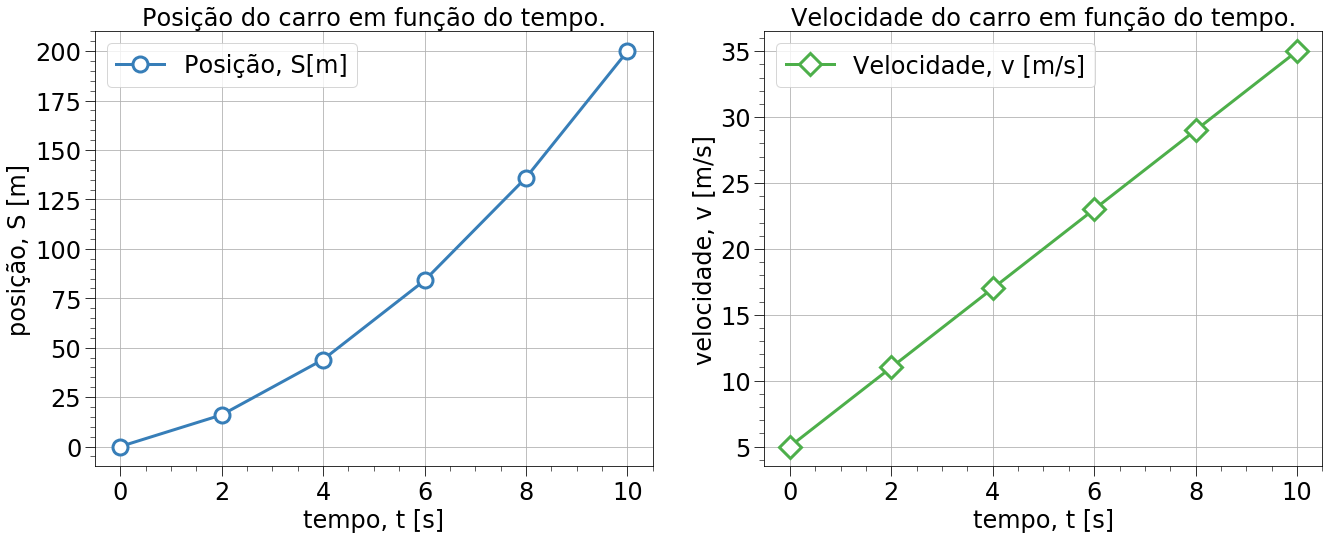

In [4]:
# variável independente: eixo x, é o tempo que cronometramos
tempos_cronometrados = [0, 2, 4, 6, 8, 10]
# variavel dependente: eixo y, é a posição do carro
def s(s0, v0, a, t):
    return s0 + v0*t + (1/2)*a*t**2

def v(v0, a, t):
    return v0 + a*t

# calculamos os valores para a posição em função do tempo
# usamos os valores de tempo cronometrados, encontrados 
# na lista definida acima - tempos_cronometrados - 
# para calcular os valores da posição do veículo. 
# Usaremos a posição inicial s0 = 0 m e a velocidade 
# constante v = 5,0 m/s. Para isso, usaremos uma
# ``lista de compreensão`` (list comprehension)
posicoes    = [s(s0=0, v0=5, a=3, t=t) for t in tempos_cronometrados];
velocidades = [v(      v0=5, a=3, t=t) for t in tempos_cronometrados];

# criamos o objeto ``Figure`` e o ``array`` com os gráficos
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(22,8))

kwargs = dict(markersize=15, markerfacecolor="#FFFFFF", markeredgewidth=3, lw=3)

# confeccionando o gráfico das posições
axarr[0].plot(
    tempos_cronometrados, # primeiro argumento são os valores do eixo x
    posicoes,             # segundo argumento são os valores do eixo y
    marker='o',           # tipo do ponto usado para marcar as coordenadas (x,y)
    color='#377eb8',      # cor
    **kwargs              # dicionário com propriedades em comum    
);

# confeccionando o gráfico das velocidades
axarr[1].plot(
    tempos_cronometrados, # primeiro argumento são os valores do eixo x
    velocidades,          # segundo argumento são os valores do eixo y
    marker='D',           # tipo do ponto usado para marcar as coordenadas (x,y)
    color='#4daf4a',      # cor
    **kwargs              # dicionário com propriedades em comum
);

FONT_SIZE=24

# loop pelos gráficos da figura:
for counter, ax in enumerate(fig.get_axes()):
# desenha as linhas que acompanham os valores nos eixos
    ax.grid()

    # é importante colocar o nome das grandezas físicas nos eixos
    ax.set_xlabel('tempo, t [s]', fontsize=FONT_SIZE);
    ax.set_ylabel(['posição, S [m]', 'velocidade, v [m/s]'][counter], fontsize=FONT_SIZE);
    ax.set_title(['Posição do carro em função do tempo.',
                  'Velocidade do carro em função do tempo.'][counter], fontsize=FONT_SIZE);
    ax.tick_params(labelsize=FONT_SIZE)
    ax.legend([['Posição, S[m]'], ['Velocidade, v [m/s]']][counter], fontsize=FONT_SIZE)

<p class='justified'>
<b>Figura 2.</b> Gráficos da posição $S$ (m) e da velocidade $v$ (m/s) do carro versus tempo $t$ (s).
</p>

<p class='justified'>
<b>b)</b> Agora vamos criar o mesmo gráfico usando a biblioteca <mark class='mono_gray'>pandas</mark>. 
</p>

<p class='justified'>
O primeiro passo é criar um <mark class='mono_gray'>DataFrame</mark> e então adicionar as colunas com os dados que temos.
</p>

In [5]:
# criamos um DataFrame usando o pandas -> pd.DataFrame
df_dados_exemplo = pd.DataFrame()
df_dados_exemplo['tempo, t [s]']   = tempos_cronometrados # adicionamos uma coluna com os tempos
df_dados_exemplo['posição, S [m]'] = posicoes # adicionamos outra coluna com as posições
df_dados_exemplo['velocidade, v [m/s]'] = velocidades # adicionamos outra coluna com as velocidades

df_dados_exemplo.style.set_caption('Tabela 1. Dados do tempo e suas respectivas posições e velocidades obtidas por meio das Eq. (5) e (7).')

,"tempo, t [s]","posição, S [m]","velocidade, v [m/s]"
0,0,0,5
1,2,16,11
2,4,44,17
3,6,84,23
4,8,136,29
5,10,200,35


<p class='justified'>
Observe que a mesma estrutura de dados pode ser criada usando um dicionário como argumento:
</p>

```python
pd.DataFrame({
    'tempo, t [s]'  : tempos_cronometrados,
    'posição, S [m]': posicoes,
    'velocidades, v [m/s]': velocidades
})
```

<a class='cell' id='figure_3'></a>

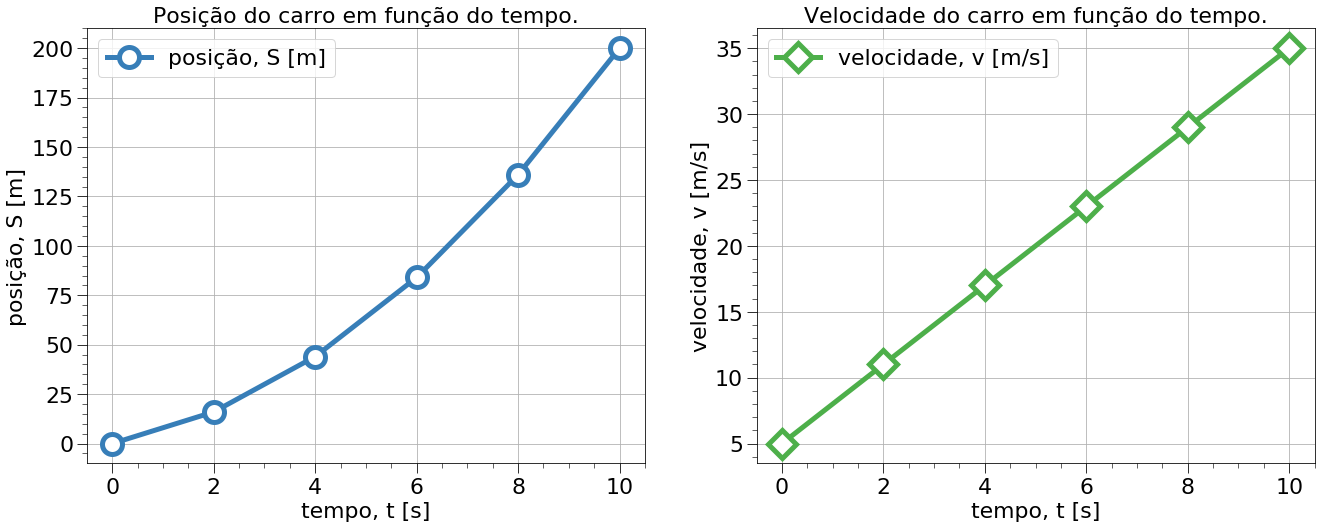

In [6]:
# criamos o objeto ``Figure`` e o ``array`` com os gráficos
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(22,8))

# dicionário com propriedades comuns nos gráficos que serão confeccionados
kwargs = dict(markersize=20, markerfacecolor="#FFFFFF", markeredgewidth=5, lw=5, xlim=(-0.5, 10.5), grid=True, fontsize=22)

# agora confeccionamos o gráfico que nos diz
# como a posição do carro evolui com o tempo
plot_exemplo_posicao = df_dados_exemplo.plot(
    x='tempo, t [s]',   # valores das variáveis independentes: eixo x
    y='posição, S [m]', # valores das variáveis dependentes: eixo y
    style='-o',         # desenha as linhas que ligam os marcadores 'o'
    color='#377eb8',    # cor da linha e dos marcadores
    ax=axarr[0],        # gráfico em que os dados devem ser plotados
    **kwargs            # argumento em comum no dicionário
);

plot_exemplo_velocidade = df_dados_exemplo.plot(
    x='tempo, t [s]',        # valores das variáveis independentes: eixo x
    y='velocidade, v [m/s]', # valores das variáveis dependentes: eixo y
    style='-D',              # desenha as linhas que ligam os marcadores 'o' 
    color='#4daf4a',         # cor da linha e dos marcadores
    ax=axarr[1],             # gráfico em que os dados devem ser plotados
    **kwargs                 # argumento em comum no dicionário
);

# tamanho da fonte dos labels
FONT_SIZE=22


# loop pelos gráficos da figura
for counter, ax in enumerate(fig.get_axes()):
    # label do eixo y
    ax.set_ylabel(['posição, S [m]','velocidade, v [m/s]'][counter], fontsize=FONT_SIZE) 
    ax.set_xlabel('tempo, t [s]', fontsize=FONT_SIZE) # label do eixo x
    ax.set_title(['Posição do carro em função do tempo.', 
                  'Velocidade do carro em função do tempo.'][counter], fontsize=FONT_SIZE) # título dos gráficos
    # legenda dos gráficos
    ax.legend([['posição, S [m]'], ['velocidade, v [m/s]']][counter], fontsize=FONT_SIZE) 

<p class='justified'>
    <b>Figura 3.</b> Gráficos da posição $S$ (m) e da velocidade $v$ (m/s) do carro versus tempo $t$ (s), confeccionados via biblioteca <mark class='mono_gray'>Pandas</mark>.
</p>

<p class='justified'>
    Observe que usando os dados provenientes de um <mark class='mono_gray'>pd.DataFrame</mark> confeccionamos o gráfico de maneira mais fácil e os <mark class='mono_gray'>labels</mark> (rótulos) dos eixos já são colocados automaticamente respeitando os nomes das colunas fornecidas.
</p>

<p class='justified'>
Observe também, que os gráficos das <b>Figuras 2 e 3</b>, fornecem uma parábola e uma reta para o deslocamento $S$ e a velocidade $v$, respectivamente. Na aula em que tratamos do <b>movimento retilíneo uniforme (MRU)</b>, vimos que o o <b>coeficiente angular</b> no gráfico $S \times t$ fornecia a velocidade constante do carro. Contudo,  no caso do <b>Movimento Retilíneo Uniformemente Variado (MRUV)</b>, tal gráfico não possui tal propriedade. Porém, nem tudo está perdido: mais adiante veremos como analisar esse tipo de movimento e tirar as propriedades de interesse, como a aceleração $a$. Enquanto isso, podemos olhar para o gráfico $v \times t$. O coeficiente angular dessa reta nos fornece exatamente a velocidade do carro. Para mostrar isso, podemos pegar quaisquer dois pontos do gráfico. Para nossa demonstração, iremos pegar os pontos apresentados na <b>Tabela 2</b>:
</p>

<br>
<div align='center'>
    <b>Tabela 2.</b> Dados de dois pontos da reta do gráfico da Figura 2.

| tempo, $t$ [s] | velocidade, $v$ [m/s] |
|:--------------:|:---------------------:|
|        4       |           11          |
|        6       |           17          |

</div>

<p class='justified'>
O <b>coeficiente angular</b> $\alpha$ é obtido calculando a expressão
</p>

$$
    \alpha = \frac{\Delta y}{\Delta x}.
    \label{eq:alpha}
$$

<p class='justified'>
A \eqref{eq:alpha} no caso do nosso exemplo, o coeficiente da reta é dado por:
</p>

$$
    \alpha = \frac{\Delta v}{\Delta t}.
$$

<p class='justified'>
Usando os dados na <b>Tabela 2</b>, temos
</p>

$$ 
    \alpha = \frac{17\,m/s - 11\,m/s}{6\,s - 4\,s} = \frac{6\,m/s}{2\,s} = 3\,m/s^2,
$$

<p class='justified'>
que é igual a aceleração do carro. Então, em um movimento retilíneo uniformemente variável, o coeficiente angular de um gráfico da velocidade em função do tempo ($v\times t$) é igual a aceleração constante do veículo, no caso de $3{,}00\,m/s^2$.
</p>

<p class='justified'>
    No experimento descrito na referência <a href='#mukai'>[1]</a> - Capítulo 4, será feita uma análise de um móvel que parte da origem ($S_0 = 0{,}0\,m$) com velocidade inicial aproximadamente nula ($v_0 \approx 0{,}0\,m/s$). Considerando essas condições iniciais de movimento, as Eqs. \eqref{eq:carro_vel} e \eqref{eq:carro_pos} se tornam respectivamente
</p>

$$
    S(t) = \frac{1}{2}a t^2
    \label{eq:pos_s0_v0}
$$

e

$$
    v = a t.
    \label{eq:vel_v0}
$$

<p class='justified'>
    No experimento, iremos trabalhar com os dados da posição do móvel em função do tempo. Esses serão utilizados para confeccionar o gráfico $S \times t$ para encontrar uma expressão muito similar à Eq. \eqref{eq:pos_s0_v0}.
</p>

<a href="#sumario">Sumário</a>

---
<a class="anchor" id="experimento_2_mruv"></a>
## Experimento 2 - MRUV [1]

<p class='justified'>
O experimento realizado no <b>Laboratório de Física Geral I</b> para se estudar o <b>movimento retilíneo uniformemente variável (MRUV)</b> tem como <b>objetivo</b> obter, a partir dos dados experimentais, uma função para a posição $S(t)$ de um móvel deslizando sobre um plano inclinado e sem atrito (ou de atrito desprezível). A partir dos dados obtidos, iremos confeccionar um gráfico da posição em função do tempo (como feito na seção anterior) para obter a aceleração (constante) do móvel. Iremos considerar em todos os nossos cálculos os conceitos da teoria de erros (Ref. <a href='#mukai'>[1]</a>, Cap. 2, págs. 6-21).
</p>

<p class='justified'>
O experimento abordado em laboratório consiste, de maneira resumida, em um trilho de ar, que se encontra levemente inclinado, no qual um móvel desliza sem atrito. Esse móvel passa por sensores, cujas posições são conhecidas, que estão acoplados a um cronômetro. Dessa maneira, o tempo que o móvel passa por cada sensor durante o movimento é cronometrado (para mais detalhes ler a descrição experimental na Ref. <a href='#mukai'>[1]</a>, Cap. 4, págs. 39-54).
<p>

<p class='justified'>
No experimento, o primeiro sensor é posicionado praticamente em cima da posição inicial do móvel (em repouso). Isso é feito para garantir as condições iniciais $S_0 = 0{,}00\,cm$ e $v_0 \approx 0{,}00\,cm/s$. Os outros quatro sensores são dispostos no trilho de ar de maneira que entre eles tenha uma distância de $15{,}00\,cm$. Assim, temos as posições dos sensores dadas por (Tabela 3):
</p>

<br>
<div align='center'>
<b>Tabela 3.</b> Dados da posição $S(t)$ de cada sensor distribuído sobre o trilho de ar.

| Sensor | Posição $S(t)$ [cm] |
|:------:|:-------------------:|
|    1   |       $0{,}00$      |
|    2   |      $15{,}00$      |
|    3   |      $30{,}00$      |
|    4   |      $45{,}00$      |
|    5   |      $60{,}00$      |
</div>

<p class='justified'>
No momento em que o móvel passa pelo primeiro sensor, o cronômetro é ativado ($t=0{,}000\, s$). A análise do movimento desse móvel começa então exatamente nesse ponto, e portanto esse é o nosso ponto inicial $S_0 = 0{,}00\,cm$. Como o primeiro sensor encontra-se praticamente encostado no móvel, no instante em que ele é ativado, sua velocidade é praticamente nula. Dessa forma, consideramos $v_0 \approx 0{,}00\,cm/s$.
</p>

<p class='justified'>
    O trilho de ar é ajustado de maneira que posua uma inclinação muito pequena. O móvel é então posicionado no ponto mais alto do trilho, onde existe um eletroímã que o prende. Quando a corrente que passa pelo eletroímã é desligada, o móvel começa a se mover devido a componente da força peso que atua paralela ao trilho de ar.
</p>

<p class='justified'>
    Da mesma forma que no experimento do <b>MRU</b>, a coleta dos dados consiste em anotar os tempos,registrados pelo cronômetro, conforme o móvel passa pelos sensores. 
</p>

<p class='justified'>
O procedimento experimental é repetido por três vezes, de modo que teremos três tempos para cada um dos sensores, ou seja para cada posição. Devemos então anotar os valores na <b>Tabela 4</b>:
</p>

<br>
<div align='center'>
    <b>Tabela 4.</b> Dados da posição $S(t)$ de cada sensor distribuído sobre o trilho de ar e o tempo $t\,[s]$ para cada repetição, e $t_m$ o tempo médio.
    
| $S\,[cm]$ | $t_1\, [s]$ | $t_2\, [s]$ | $t_3\, [s]$ | $t_m\, [s]$    |
|:---------:|:-----------:|:-----------:|:-----------:|:--------------:|
|      0,00 |             |             |             |                |
|     15,00 |             |             |             |                |
|     30,00 |             |             |             |                |
|     45,00 |             |             |             |                |
|     60,00 |             |             |             |                |
</div>

<p class='justified'>
Após coletado os dados e calculado o valor médio do tempo em que o móvel passa por cada um dos sensores, iremos analisar os resultados. Para isso,
</p>

<p class='justified'>
<ol class="sub-item">
    <li class="sub-item">confeccione um gráfico de $S \times t_m$;</li>
    <li class="sub-item"> obtenha a equação de movimento usando:
        <ol class="sub-item">
            <li class="sub-item">método da linearização;</li>
            <li class="sub-item">a escala log-log;</li>
        </ol>
    </li>
    <li class="sub-item">ajuste os dados a um modelo teórico:
        <ol class="sub-item">
            <li class="sub-item">usando a escala original e a função <mark class='mono_gray'>numpy.polyfit()</mark>;</li>
            <li class="sub-item">encontrando o coeficiente linear quando a escala log-log é aplicada;</li>
        </ol>
        </li>
    <li class="sub-item">escrever a equação final que melhor ajusta os dados coletados.</li>
</ol>
</p>


<a href="#sumario">Sumário</a>

---
<a class="anchor" id="analisando_os_dados_obtidos_usando_python"></a>
# Analisando os dados obtidos usando Python

<p class='justified'>
Nessa seção, iremos trabalhar com a análise dos dados do experimento do movimento retilíneo uniformemente variável (MRUV). Os dados trabalhados foram obtidos por alunos de uma turma do primeiro ano de Engenharia Civil no ano de 2019 (<b>Tabela 5</b>). A partir de nossas análises, passo a passo, você deverá ganhar intuição e conseguir, com seus próprios dados experimentais fazer análises semelhantes.
</p>

<div align='center'>
<b>Tabela 5.</b> Dados da posição $S(t)$ [cm] de cada sensor distribuído sobre o trilho de ar e o tempo $t$ [s] para cada repetição, e $t_m$ o tempo médio.


| S [cm] | t1 [s] | t2 [s] | t3 [s] | $t_m\, [s]$    |
|:------:|:------:|:------:|:------:|:--------------:|
|   0.00 |  0.000 |  0.000 |  0.000 |      0.000     |
|  15.00 |  1.261 |  1.181 |  1.197 |      1.213     |
|  30.00 |  1.774 |  1.694 |  1.701 |      1.723     |
|  45.00 |  2.169 |  2.089 |  2.103 |      2.120     |
|  60.00 |  2.509 |  2.429 |  2.443 |      2.460     |
</div>

<p class='justified'>
Para o arredondamento dos valores do tempo médio foi considerado o número de algarismos significativos e não considerando o desvio da média.
</p>

<a href="#sumario">Sumário</a>

---
<a class="anchor" id="apresentando_os_dados"></a>
## Apresentando os dados

<p class='justified'>
    Assim como no experimento do <b>MRU</b>, os primeiros dados que temos desse experimento são as posições de cada um dos sensores. Assim, definiremos uma lista com os valores dessas posições. Observe que o separador decimal é o ponto ao invés da vírgula.
</p>

---
<a class="anchor" id="posicao_dos_sensores"></a>
### Posição dos sensores

In [4]:
# lista com os valores das posições dos sensores
# essa variável será a mesma para suas análises individuais
posicao_sensores = [0.00, 15.00, 30.00, 45.00, 60.00] # em cm
posicao_sensores

[0.0, 15.0, 30.0, 45.0, 60.0]

---
<a class="anchor" id="tempo_cronometrado_nos_sensores"></a>
### Tempo cronometrado nos sensores

<p class='justified'>
Os próximos dados são os tempos que foram anotados no cronômetro quando o móvel passava por cada um dos sensores. Para cada uma das repetições do procedimento experimental, definiremos uma lista da seguinte forma
</p>

```python
    tempos_realizacao_n = [
        t_0,  # tempo no sensor 1 -  0.00cm
        t_15, # tempo no sensor 2 - 15.00cm
        t_30, # tempo no sensor 3 - 30.00cm
        t_45, # tempo no sensor 4 - 45.00cm
        t_60, # tempo no sensor 5 - 60.00cm
    ]
```
<p class='justified'>
para a $n$-ésima repetição experimental. 
</p>

<p class='justified'>
Os dados medidos pelos alunos, para as três realizações são escritas então em três listas:
</p>

In [5]:
#                      t_0    t_15   t_30   t_45   t_60
tempos_realizacao_1 = [0.000, 1.261, 1.774, 2.169, 2.509]
tempos_realizacao_2 = [0.000, 1.181, 1.694, 2.089, 2.429]
tempos_realizacao_3 = [0.000, 1.197, 1.701, 2.429, 2.443]

<p class='justified'>
    Na sequência se cria um <mark class='mono_gray'>DataFrame</mark> usando o <mark class='mono_gray'>pandas</mark> para que os dados fiquem dispostos de uma forma que favoreça a visualização e as operações matemáticas que precisamos realizar.
</p>

In [9]:
# criamos o DataFrame
df_dados = pd.DataFrame()

# criamos cada coluna especificando um nome e atribuindo uma lista de valores 
df_dados['S [cm]'] = posicao_sensores
df_dados['t1 [s]'] = tempos_realizacao_1
df_dados['t2 [s]'] = tempos_realizacao_2
df_dados['t3 [s]'] = tempos_realizacao_3

df_dados

,S [cm],t1 [s],t2 [s],t3 [s]
0,0.0,0.000,0.000,0.000
1,15.0,1.261,1.181,1.197
2,30.0,1.774,1.694,1.701
3,45.0,2.169,2.089,2.429
4,60.0,2.509,2.429,2.443


In [10]:
# podemos mudar os índices também para lembrarmos o que cada linha representa
df_dados.index = ['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5']

df_dados.style.set_caption('Dados adquiridos durante o experimento.')

,S [cm],t1 [s],t2 [s],t3 [s]
Sensor 1,0,0,0,0
Sensor 2,15,1.261,1.181,1.197
Sensor 3,30,1.774,1.694,1.701
Sensor 4,45,2.169,2.089,2.429
Sensor 5,60,2.509,2.429,2.443


<a href="#sumario">Sumário</a>

---
<a class="anchor" id="calculando_a_media_dos_tempos_nos_sensores"></a>
### Calculando a média dos tempos nos sensores

<a class='cell' id='media_sensor_15cm'></a>
<p class='justified'>
A próxima etapa é calcular a média dos tempos que leva para o móvel passar no mesmo sensor. Para isso, selecionamos os valores dos tempos de um dos sensores, por exemplo, o sensor da posição $15{,}00\,cm$, somamos seus valores e dividimos pelo número de repetição do experimento, ou seja, 3:
</p>

$$
    \text{Média dos tempos para o Sensor 2 }(15{,}00\,cm)\\
    \frac{1{,}261\,s+1{,}181\,s+1{,}197\,s}{3} = \frac{3{,}639\,s}{3} = 1{,}213\,s.
$$

<p class='justified'>
    Em <mark class='mono_gray'>Python</mark> muitas vezes conseguimos executar uma tarefa usando diferentes ferramentas. Nesse nosso caso, poderíamos calcular a média dos tempos "na mão", digitando os valores para cada sensor e suas respectivas repetições, como feito no exemplo. Assim, usando <mark class='mono_gray'>listas</mark>, calcularíamos a média de tempos referente ao sensor 2 da seguinte forma:
</p>

In [11]:
# criamos uma lista com os valores dos tempos para o sensor 2
tempos_sensor_2 = [1.261, 1.181, 1.197]

# somamos os valores da lista usando a função ``sum``
soma_dos_tempos_sensor_2 = sum(tempos_sensor_2)

# e dividimos o resultado da soma pelo número de realizações: 3
soma_dos_tempos_sensor_2/3

1.213

<p class='justified'>
    Também podemos criar uma função para calcular a média quando tivermos muitos termos em uma lista:
</p>

In [12]:
def tempo_medio_sensor(lista):
    """
    Função que calcular o valor médio dos tempos para um dado sensor.
    
    Argumento:
    ----------
    lista - list: lista com os valores dos tempos marcados no sensor em questão
                  quando o móvel passa por ele
                  
    Retorno:
    --------
    tempo médio - float: tempo médio que leva para o móvel passar pelo sensor em questão.
    """
    # sum(lista) - calcula a soma dos valores da lista, i.e., dos tempos
    # len(lista) - retorna o tamanho da lista, i.e., o número de elementos que ela possui.
    #              No nosso caso, o tamanho da lista é o número de experimentos que foram
    #              realizados.
    return sum(lista)/len(lista)

<p class='justified'>
Agora basta calcular o tempo médio para cada um dos sensores. Usando, mais uma vez, o sensor 2 como exemplo:
</p>

In [13]:
# definimos um pouco acima tempos_sensor_2 = [0.901, 0.909, 0.906, 0.904]
tempo_medio_sensor(tempos_sensor_2)

1.213

<p class='justified'>
Isso já melhora um pouco e evita algumas etapas no processo. Contudo, ainda teríamos que calcular a média de tempo de sensor por sensor. Existe um método muito mais conveniente para nos ajudar nessa tarefa (e evitar a fadiga). Usando a estrutura de <mark class='mono_gray'>DataFrame</mark> do <mark class='mono_gray'>pandas</mark>, várias tarefas que podem ser maçantes acabam se tornando triviais. Podemos, com apenas uma linha de código, calcular o valor médio dos tempos de todos os sensores:
</p>

In [14]:
# primeiramente selecionamos somente as colunas com os tempos
df_dados[['t1 [s]', 't2 [s]', 't3 [s]']]

,t1 [s],t2 [s],t3 [s]
Sensor 1,0.000,0.000,0.000
Sensor 2,1.261,1.181,1.197
Sensor 3,1.774,1.694,1.701
Sensor 4,2.169,2.089,2.429
Sensor 5,2.509,2.429,2.443


<p class='justified'>
    Veja que o <mark class='mono_gray'>DataFrame</mark> anterior contêm somente as colunas dos tempos, que são os valores que nos interessam para o cálculo das médias em cada um dos sensores. Temos então que calcular a média dos valores levando em consideração todos os valores de uma mesma linha, isto é, referente a um mesmo sensor. Para isso, basta aplicarmos o método <mark class='mono_gray'>mean()</mark> no <mark class='mono_gray'>DataFrame</mark> <mark class='mono_gray'>df_dados</mark> e especificar o eixo, que nesse caso é o horizontal <mark class='mono_gray'>axis=1</mark>:
</p>

In [15]:
df_dados[['t1 [s]', 't2 [s]', 't3 [s]']].mean(axis=1)

Sensor 1    0.000000
Sensor 2    1.213000
Sensor 3    1.723000
Sensor 4    2.229000
Sensor 5    2.460333
dtype: float64

<p class='justified'>
E pronto! Agora, para adicionarmos essa nova coluna de valores ao nosso <mark class='mono_gray'>DataFrame</mark>, basta usarmos a mesma <mark class='mono_gray'>sintaxe</mark> que usamos para adicionar uma coluna a um <mark class='mono_gray'>DataFrame</mark>:
</p>

In [12]:
# especificamos um nome para a nova coluna e atribuímos os valores que serão dispostos nessa nova coluna
df_dados['tempo médio [s]'] = df_dados[['t1 [s]', 't2 [s]', 't3 [s]']].mean(axis=1).round(3)

df_dados.style.set_caption('Dados adquiridos durante o experimento e os valores médios dos tempos.')

,S [cm],t1 [s],t2 [s],t3 [s],tempo médio [s]
Sensor 1,0,0,0,0,0
Sensor 2,15,1.261,1.181,1.197,1.213
Sensor 3,30,1.774,1.694,1.701,1.723
Sensor 4,45,2.169,2.089,2.429,2.229
Sensor 5,60,2.509,2.429,2.443,2.46


<p class='justified'>
    O último método <mark class='mono_gray'>round()</mark> com argumento <mark class='mono_gray'>3</mark>, foi para arredondar os valores obtidos, levando em consideração os algarismos significativos.
</p>

<a href="#sumario">Sumário</a>

---
<a class="anchor" id="calculando_o_desvio_padrao_dos_tempos_nos_sensores"></a>
### Calculando o desvio padrão dos tempos nos sensores

<p class='justified'>
Agora iremos calcular o desvio padrão dos tempos que leva para o móvel passar no mesmo sensor. Vamos exemplificar o cálculo para o sensor da posição $15{,}00\,cm$, como fizemos com a média. <a href='#media_sensor_15cm'>Lembrando</a> que a média de tempo nesse sensor foi de $0{,}905\,s$, o desvio padrão é calculado pela seguinte expressão:
</p>

$$
    \text{Desvio padrão dos tempos para o Sensor 2 }(15{,}00\,cm)
$$

$$
    \sigma_{t, \text{Sensor 2}} = \sqrt{\frac{\left(1{,}261\,s - 1{,}213\,s \right)^2+\left(1{,}181\,s - 1{,}213\,s \right)^2+\left(1{,}197\,s - 1{,}213\,s \right)^2}{3-1}}
$$

$$
    \sigma_{t, \text{Sensor 2}} = \sqrt{\frac{\left(0{,}048\,s \right)^2+\left(-0{,}032\,s \right)^2+\left(-0{,}016\,s \right)^2}{2}}
$$

$$
    \sigma_{t, \text{Sensor 2}} = \sqrt{\frac{2{,}3\times 10^{-3}\,s^2 + 1{,}0\times 10^{-3}\,s^2 + 0{,}2\times 10^{-3}\,s^2}{2}}
$$

$$
    \sigma_{t, \text{Sensor 2}} = \sqrt{\frac{3{,}6\times 10^{-3}\,s^2}{2}} = \sqrt{ 1{,}8\times 10^{-3}\,s^2} = 0{,}042\,s.
$$


<p class='justified'>
    Se usarmos <mark class='mono_gray'>listas</mark>, podemos calcular o desvio padrão de tempos referente ao sensor 2 da seguinte forma:
</p>

In [2]:
# criamos uma lista com os valores dos tempos para o sensor 2
tempos_sensor_2 = [1.261, 1.181, 1.197]
# calculamos a média
tempos_media_sensor_2 = sum(tempos_sensor_2)/3


# somamos os valores da lista usando a função ``sum``
soma_dos_tempos_menos_media_sensor_2 = sum([(tempo - tempos_media_sensor_2)**2 for tempo in tempos_sensor_2])

# dividimos o valor por 4-1 e tiramos a raiz quadrada
desvio_padrao_sensor_2 = ( soma_dos_tempos_menos_media_sensor_2/(3-1) )**(1/2)

# arredondamos o valor
round(desvio_padrao_sensor_2, 3)

0.042

<p class='justified'>
Podemos definir uma função que calcule isso:
</p>

In [18]:
def desvio_padrao_tempo_sensor(lista):
    """
    Função que calcular o desvio padrão dos tempos para um dado sensor.
    
    Argumento:
    ----------
    lista - list: lista com os valores dos tempos marcados no sensor em questão
                  quando o móvel passa por ele
                  
    Retorno:
    --------
    desvio padrão - float: desvio padrão dos tempos.
    """
    # primeiro calculamos a média da lista
    media_da_lista = sum(lista)/len(lista)
    
    # agora pegamos cada termo da lista, subtraímos da média e elevamos ao quadrado 
    lista_ao_quadrado = [(tempo - media_da_lista)**2 for tempo in lista]
    
    # agora somamos os valores dessa lista ao quadrado
    radicando = sum(lista_ao_quadrado)/(len(lista_ao_quadrado) - 1)
    
    # tomamos a raiz quadrada do radicando
    desvio_padrao = (radicando)**(1/2)
    
    # arredondamos o valor e o retornamos
    return round(desvio_padrao, 3)

<p class='justified'>
Agora basta calcular o desvio padrão do tempo para cada um dos sensores. Usando, mais uma vez, o sensor 2 como exemplo:
</p>

In [19]:
# definimos um pouco acima tempos_sensor_2 = [0.901, 0.909, 0.906, 0.904]
desvio_padrao_tempo_sensor(tempos_sensor_2)

0.042

<p class='justified'>
Vimos que se usarmos uma estrutura de <mark class='mono_gray'>DataFrame</mark> do <mark class='mono_gray'>pandas</mark> nossa vida fica muito mais fácil:
</p>

In [20]:
# primeiramente selecionamos somente as colunas com os tempos
df_dados[['t1 [s]', 't2 [s]', 't3 [s]']]

,t1 [s],t2 [s],t3 [s]
Sensor 1,0.000,0.000,0.000
Sensor 2,1.261,1.181,1.197
Sensor 3,1.774,1.694,1.701
Sensor 4,2.169,2.089,2.429
Sensor 5,2.509,2.429,2.443


<p class='justified'>
    Veja que o <mark class='mono_gray'>DataFrame</mark> anterior contêm somente as colunas dos tempos, que são os valores que nos interessam para o cálculo dos desvios padrões em cada um dos sensores. Temos então que calcular o desvio padrão dos valores levando em consideração todos os valores de uma mesma linha, isto é, referente a um mesmo sensor. Para isso, basta aplicarmos o método <mark class='mono_gray'>std()</mark> (<i>Standard Deviation</i>) no <mark class='mono_gray'>DataFrame</mark> <mark class='mono_gray'>df_dados</mark> e especificar o eixo, que nesse caso é o horizontal <mark class='mono_gray'>axis=1</mark>:
</p>

In [21]:
df_dados[['t1 [s]', 't2 [s]', 't3 [s]']].std(axis=1)

Sensor 1    0.000000
Sensor 2    0.042332
Sensor 3    0.044306
Sensor 4    0.177764
Sensor 5    0.042724
dtype: float64

<p class='justified'>
    Contudo, para o Sensor 4, a incerteza é maior. Portanto, devemos arredondar os número de forma apropriada para que o desvio no valor médio seja considerado de maneira correta. Como temos poucos número, poderíamos fazer isso na mão, criando a seguinte lista:
</p>

In [13]:
desvio_padrao_tempos_lista = [0.0, 0.04, 0.04, 0.2, 0.04]
desvio_padrao_tempos_lista

[0.0, 0.04, 0.04, 0.2, 0.04]

<p class='justified'>
    Ou então, poderíamos usar uma lista de compreensão para transformar os números em strings checar se existe um <mark class='mono_gray'>0</mark> na quarta posição:
</p>

In [23]:
[round(i, 2) if len(str(i)) > 2 and str(i)[2] == '0' else round(i, 1) for i in df_dados[['t1 [s]', 't2 [s]', 't3 [s]']].std(axis=1)]

[0.0, 0.04, 0.04, 0.2, 0.04]

<p class='justified'>
E pronto! Agora, para adicionarmos essa nova coluna de valores ao nosso <mark class='mono_gray'>DataFrame</mark>, basta usarmos a mesma <mark class='mono_gray'>sintaxe</mark> que usamos para adicionar uma coluna a um <mark class='mono_gray'>DataFrame</mark>:
</p>

In [14]:
# especificamos um nome para a nova coluna e atribuímos os valores que serão dispostos nessa nova coluna
df_dados['desvio padrão [s]'] = desvio_padrao_tempos_lista

df_dados.style.set_caption('Dados adquiridos durante o experimento e os valores médios e desvios padrões dos tempos')

,S [cm],t1 [s],t2 [s],t3 [s],tempo médio [s],desvio padrão [s]
Sensor 1,0,0,0,0,0,0
Sensor 2,15,1.261,1.181,1.197,1.213,0.04
Sensor 3,30,1.774,1.694,1.701,1.723,0.04
Sensor 4,45,2.169,2.089,2.429,2.229,0.2
Sensor 5,60,2.509,2.429,2.443,2.46,0.04


<p class='justified'>
    Porém, temos que arrumar os valores médios para que a representação final possa estar correta. Para arredondá-los e substituí-los, usamos o método <mark class='mono_gray'>replace(valor_velho, valor_novo)</mark>. No nosso caso, iremos fornecer duas listas, de maneiras que os elementos possam ser substituídos na mesma ordem:
</p>

In [15]:
dados_antigos    = [1.213, 1.723, 2.229, 2.46]
dados_corrigidos = [1.21, 1.72, 2.2, 2.46]
df_dados.replace(dados_antigos, dados_corrigidos, inplace=True)

<p class='justified'>
    Lembrando que a propriedade <mark class='mono_gray'>inplace=True</mark> faz as mudanças permanecerem no objeto em questão.
</p>

In [16]:
df_dados

,S [cm],t1 [s],t2 [s],t3 [s],tempo médio [s],desvio padrão [s]
Sensor 1,0.0,0.000,0.000,0.000,0.00,0.00
Sensor 2,15.0,1.261,1.181,1.197,1.21,0.04
Sensor 3,30.0,1.774,1.694,1.701,1.72,0.04
Sensor 4,45.0,2.169,2.089,2.429,2.20,0.20
Sensor 5,60.0,2.509,2.429,2.443,2.46,0.04


<p class='justified'>
    Desta forma, podemos criar uma coluna especificando como os valores devem ser reportados. Nosso objetivo é juntar as colunas <mark class='mono_gray'>tempo médio [s]</mark> e <mark class='mono_gray'>desvio padrão [s]</mark> de maneira que cada valor seja separado pelo sinal de <mark class='mono_gray'>±</mark>. Podemos realizar isso de várias formas. Talvez a mais rápida, com menos código, seja a usando o método <mark class='mono_gray'>agg()</mark> (<i>aggregate</i>) do <mark class='mono_gray'>DataFrame</mark>. Seu primeiro argumento é a string que irá estar juntando os valores agregados e o segundo é a direção em que a operação deve ser realizada, ou seja, nas linhas ou nas colunas:
</p>

In [27]:
df_dados[['tempo médio [s]', 'desvio padrão [s]']].astype(str).agg(" ± ".join, axis=1)

Sensor 1      0.0 ± 0.0
Sensor 2    1.21 ± 0.04
Sensor 3    1.72 ± 0.04
Sensor 4      2.2 ± 0.2
Sensor 5    2.46 ± 0.04
dtype: object

<p class='justified'>
    Aqui aplicamos o método <mark class='mono_gray'>astype()</mark> com o argumento <mark class='mono_gray'>str</mark> para transformar nossos números em strings para que eles pudessem ser agregados. Assim, criamos uma nova coluna com essa representação:
</p>

In [17]:
df_dados['dados reportados'] = df_dados[['tempo médio [s]', 'desvio padrão [s]']].astype(str).agg(" ± ".join, axis=1)
df_dados

,S [cm],t1 [s],t2 [s],t3 [s],tempo médio [s],desvio padrão [s],dados reportados
Sensor 1,0.0,0.000,0.000,0.000,0.00,0.00,0.0 ± 0.0
Sensor 2,15.0,1.261,1.181,1.197,1.21,0.04,1.21 ± 0.04
Sensor 3,30.0,1.774,1.694,1.701,1.72,0.04,1.72 ± 0.04
Sensor 4,45.0,2.169,2.089,2.429,2.20,0.20,2.2 ± 0.2
Sensor 5,60.0,2.509,2.429,2.443,2.46,0.04,2.46 ± 0.04


<p class='justified'>
    Como mencionado (em algum lugar, tenho quase certeza...) em <mark class='mono_gray'>Python</mark> existem diversas formas de se obter o mesmo resultado. Existem umas formas que a gente entende melhor que outras. Por exemplo, poderíamos obter a coluna de dados reportados com um <mark class='mono_gray'>loop for</mark>. Vamos fazer isso por partes. Podemos criar um <mark class='mono_gray'>array</mark> de duas colunas para usar em um <mark class='mono_gray'>loop for</mark> com duas variáveis. Para criar o <mark class='mono_gray'>array</mark>, simplesmente selecionamos as colunas desejadas e aplicamos a propriedade <mark class='mono_gray'>values</mark>:
</p>

In [18]:
# aplicamos a propriedade ``values``
media_std_valores = df_dados[['tempo médio [s]', 'desvio padrão [s]']].values
media_std_valores

array([[0.  , 0.  ],
       [1.21, 0.04],
       [1.72, 0.04],
       [2.2 , 0.2 ],
       [2.46, 0.04]])

In [30]:
# aplicamos o loop com duas variáveis para agregar as strings
[str(media) + " ± " + str(std) for media, std in media_std_valores]

['0.0 ± 0.0', '1.21 ± 0.04', '1.72 ± 0.04', '2.2 ± 0.2', '2.46 ± 0.04']

<a href="#sumario">Sumário</a>

---
<a class="anchor" id="confeccionando_o_grafico_sxt"></a>
# Confeccionando o gráfico $S \times t_m$

<p class='justified'>
Nosso interesse é analisar como a posição $S$ do móvel evolui com relação ao tempo médio $t_m$. Contudo, antes de confeccionarmos um gráfico $S \times t_m$, vamos elaborar uma figura onde os tempos de cada repetição possam ser comparados. Nossa figura deve então ser constituída de cinco valores em cada uma das posições $S$. Podemos fazer isso usando um gráfico de barras:.
</p>

Text(0.5, 0, 'Tempo [s]')

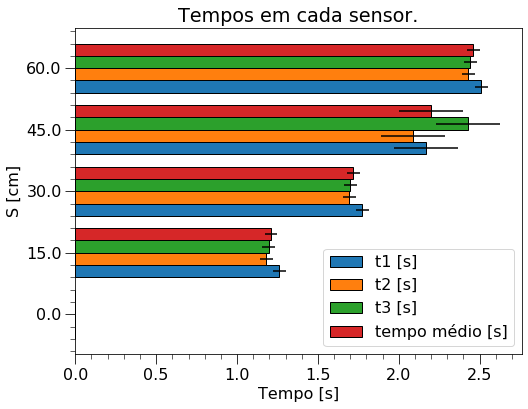

In [19]:
plot_bar_df_dados = df_dados.plot.barh(
    # para cada valor da variável x, teremos vários valores correspondentes
    # que serão comparados. No nosso caso, a variável x é a posição, e os 
    # valores comparados são os tempos de cada repetição e o valor médio
    
    xerr='desvio padrão [s]', #definimos os desvios dos valores
    x='S [cm]', # variável x, onde os valores serão comparados
    y=['t1 [s]', 't2 [s]', 't3 [s]', 'tempo médio [s]'], # valores comparados
    width=0.8, # define a espessura das barras
    edgecolor='#000000', # define a cor das bordas das barras
    title='Tempos em cada sensor.' # define o título da figura
)
plot_bar_df_dados.set_xlabel('Tempo [s]') # define o label do eixo x

<p class='justified'>
    <b>Figura 4.</b> Gráfico de barras comparando os tempos cronometrados nos sensores em cada uma das repetições, incluindo valores médios. As barras de erro são respectivas aos desvios padrões.
</p>

<p class='justified'>
Podemos fazer a leitura do gráfico ficar um pouco melhor. Para isso, iremos mudar os labels dos ticks no eixo y. Para isso, usamos o método <mark class='mono_gray'>set_yticklabels()</mark> e passamos uma lista de strings que substituirão os valores presentes. Primeiro, vamos criar uma lista com os labels que queremos:
</p>

In [20]:
lista_de_labels = ['Sensor 1\n0,00 cm', 'Sensor 2\n15,00 cm', 'Sensor 3\n30,00 cm', 'Sensor 4\n45,00 cm', 'Sensor 5\n60,00 cm']

lista_de_labels

['Sensor 1\n0,00 cm',
 'Sensor 2\n15,00 cm',
 'Sensor 3\n30,00 cm',
 'Sensor 4\n45,00 cm',
 'Sensor 5\n60,00 cm']

<p class='justified'>
Lembrando que poderíamos ter usado uma lista de compreensão para criar a lista acima:
</p>

In [21]:
['Sensor ' + str(i+1) + '\n' + str(i*15) + ',00 cm' for i in range(5)]

['Sensor 1\n0,00 cm',
 'Sensor 2\n15,00 cm',
 'Sensor 3\n30,00 cm',
 'Sensor 4\n45,00 cm',
 'Sensor 5\n60,00 cm']

<p class='justified'>
Vamos então substituir os labels dos ticks do eixo y:
</p>

<a class='cell' id='figure_5'></a>

[Text(0, 0, 'Sensor 1\n0,00 cm'),
 Text(0, 0, 'Sensor 2\n15,00 cm'),
 Text(0, 0, 'Sensor 3\n30,00 cm'),
 Text(0, 0, 'Sensor 4\n45,00 cm'),
 Text(0, 0, 'Sensor 5\n60,00 cm')]

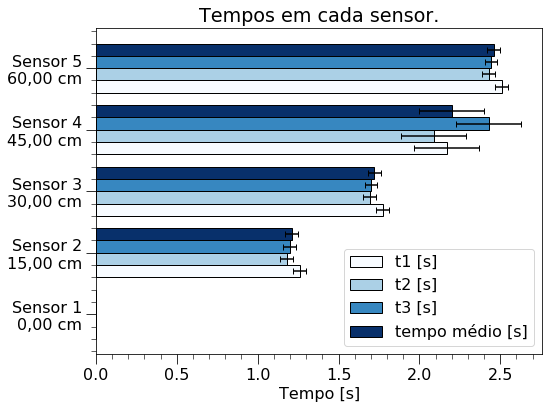

In [22]:
plot_bar_df_dados = df_dados.plot.barh(
    # para cada valor da variável x, teremos vários valores correspondentes
    # que serão comparados. No nosso caso, a variável x é a posição, e os 
    # valores comparados são os tempos de cada repetição e o valor médio
    xerr='desvio padrão [s]', # definimos os desvios dos valores
    x='S [cm]', # variável x, onde os valores serão comparados
    y=['t1 [s]', 't2 [s]', 't3 [s]', 'tempo médio [s]'], # valores comparados
    width=0.8, # define a espessura das barras
    edgecolor='#000000', # define a cor das bordas das barras
    capsize=3, # definimos o tamanho da barra perpendicular à barra de erro
    cmap='Blues', # definimos um map de cores para as barras em um valor de y
    title='Tempos em cada sensor.' # define o título da figura
)
plot_bar_df_dados.set_xlabel('Tempo [s]') # define o label do eixo x
plot_bar_df_dados.set_ylabel('') # deixamos em branco o label do eixo y
plot_bar_df_dados.set_yticklabels(lista_de_labels) # trocamos os labels dos ticks do eixo y

<p class='justified'>
    <b>Figura 5.</b> Gráfico de barras comparando os tempos cronometrados nos sensores em cada uma das repetições, incluindo valores médios. As barras de erro são respectivas aos desvios padrões.
</p>

<p class='justified'>
    Observe que também usamos a propriedade <mark class='mono_gray'>cmap</mark> para mudar as cores das barras em cada um dos valores de y, fornecendo o mapa de cores <mark class='mono_gray'>'Blues'</mark>.
</p>

<p class='justified'>
Com esse gráfico podemos confirmar que as repetições do experimento foram feitas de maneira que as condições foram mantidas praticamente iguais em cada uma das repetições. Veja que os valores representados por cada barra, em cada um dos sensores, não mudam quase nada de uma para outra. Isso acarreta em um valor médio muito próximo aos valores aferidos nas repetições e um desvio padrão muito pequeno, já que os valores de cada medida varia muito pouco em relação a média.
</p>

<p class='justified'>
    Vimos então que os tempos médios são provenientes de repetições experimentais que reproduzem adequadamente o mesmo comportamento físiso. Desta forma, com os valores da posição $S$ e do tempo médio $t_m$ do <mark class='mono_gray'>DataFrame df_dados</mark>é fácil confeccionarmos o gráfico que estamos interessados (ver final da seção <a href='#experimento_2_mruv'>3.1</a>):
</p>

<a class='cell' id='figure_6'></a>

Text(0, 0.5, 'Posição do móvel, S [cm]')

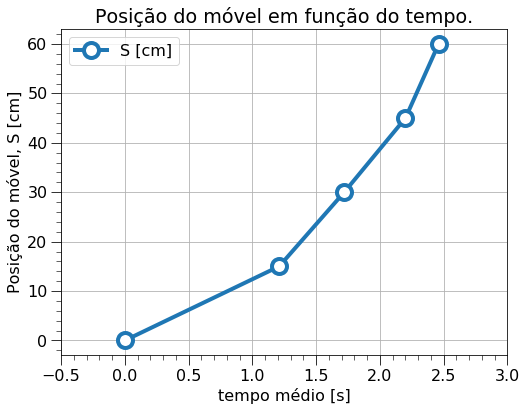

In [23]:
# agora confeccionamos o gráfico que nos diz
# como a posição do carro evolui com o tempo
plot_df_dados = df_dados.plot(
    x='tempo médio [s]',     # valores das variáveis independentes: eixo x
    y='S [cm]',              # valores das variáveis dependentes: eixo y
    style='-o',              # desenha as linhas que ligam os marcadores 'o'
    markersize=15,           # escolhe o tamanho do marcador/ponto
    markerfacecolor="white", # cor do interior do ponto
    markeredgewidth=4,       # escolhe a espessura da borda do marcador/ponto
    lw=4,                    # escolhe a espessura da linha que liga os pontos
    xlim=(-0.5, 3),          # muda o intervalo do eixo-x
    grid=True,               # desenha as linhas que acompanham os valores nos eixos    
    title='Posição do móvel em função do tempo.' # adiciona título ao gráfico
);

plot_df_dados.set_ylabel('Posição do móvel, S [cm]') # colocamos o label no eixo-y

<p class='justified'>
<b>Figura 6.</b> Gráfico da Posição $S\, (m)$ versus tempo médio $t_m\, (s)$, referente aos dados da <b>Tabela 5</b>.
</p>

<p class='justified'>
As opções colocadas nesse gráfico são as mesmas encontradas no gráfico da <a href='#figure_3'><b>Figura 3</b></a>. iremos manter um padrão para que você vá se habituando com os comandos. Contudo, eu encorajo vocês a mudar as opções e fazerem o gráfico ficar da maneira que preferirem. Isso ajuda a fixar melhor o conteúdo e também satisfaz o senso de estética de cada um. =)
</p>

<p class='justified'>
    Ao contrário do experimento do MRU, vemos que o tipo de relação não é <b>linear</b>!
    Para analisar essa curva e obter propriedades referentes a ela que ajudem a explicar o movimento observado, primeiramente iremos usar o <mark class='mono_gray'>método de linearização</mark>.
</p>

<a href="#sumario">Sumário</a>

---
<a class="cell" id="metodo_de_linearizacao"></a>
# Método de linearização

<p class='justified'>
    Os dados mostrados na <a href="#figure_6">Figura 6</a> não é linear como comentamos. Ele possui um aspecto que nos lembra uma parábola, isto é, uma função que tenha um termo quadrático no tempo. Podemos investigar esse nosso palpite linearizando nossos dados e confeccionar um gráfico para averiguar o comportamento. 
</p>

<p class='justified'>
    Quando confeccionamos um gráfico de uma função do tipo $y = Ct^2$, ela se parece com algo que observamos na <a href="#figure_6">Figura 6</a>. Ou seja, $y \times t$ é uma parábola. Contudo, se mudarmos a variável e confeccionarmos um gráfico de $y \times t^2$ uma reta, com coeficiente angular $C$, deve ser observada. Vamos mostrar isso com um exemplo antes de irmos para nossos dados.
</p>

In [36]:
# variável independente
X = np.arange(0,10)
# variável dependente: y = 5x²
Y = 5*X**2
# variável independente ao quadrado
X2 = X**2

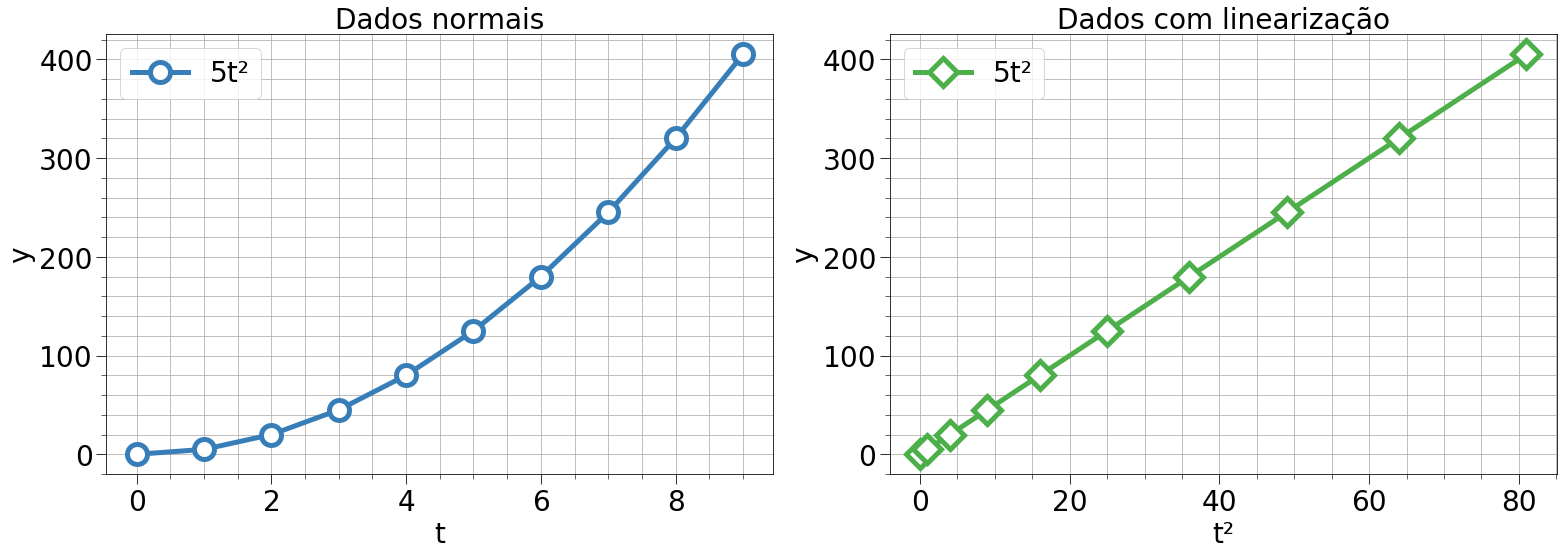

In [253]:
# criando a figura com dois gráficos: uma linha e duas colunas
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

# dicionário com opções em comum para os gráficos
kwargs = dict(markersize=20, markerfacecolor='#FFFFFF', markeredgewidth=5, lw=5)

# gráfico 1
axarr[0].plot(
    X,               # variável independente
    Y,               # variável dependente
    marker='o',      # escolhendo o tipo de marcador
    color='#377eb8', # cor
    **kwargs         # dicionário com propriedades em comum
)

# gráfico 2
axarr[1].plot(
    X2,              # variável independente
    Y,               # variável dependente
    marker='D',      # escolhendo o tipo de marcador
    color='#4daf4a', # cor
    **kwargs         # dicionário com propriedades em comum
)

# tamanho da fonte para todos os labels
FONT_SIZE=28

# loop nos gráficos
for counter, ax in enumerate(fig.get_axes()):
    # adicionando os labels no eixo x
    ax.set_xlabel(['t', 't²'][counter], fontsize=FONT_SIZE)
    # adicionando os labels no eixo y
    ax.set_ylabel('y', fontsize=FONT_SIZE)
    # mudando o tamanho dos labels dos ticks
    ax.tick_params(labelsize=FONT_SIZE)
    # adicionando os títulos
    ax.set_title(['Dados normais', 'Dados com linearização'][counter], fontsize=FONT_SIZE)
    # adicionando as legendas
    ax.legend(['5t²'], fontsize=FONT_SIZE)
    # colocando os grids nos ticks maiores
    ax.grid(which='both')
    
# ajusta o espaçamento entre os gráficos
fig.tight_layout()

<p class='justified'>
    Veja que se calcularmos o coeficiente angular do gráfico $y \times t^2$, iremos obter o valor de $C = 5$:
</p>

$$
    \alpha = \frac{\Delta y}{\Delta t^2} = \frac{245 - 180}{49 - 36} = \frac{65}{13} = 5.
$$

<p class='justified'>
    Agora vamos ver o que acontece se aplicarmos esse procedimento em nossos dados. Vamos então elevar os valores de $t_m$ ao quadrado e adicionar uma nova coluna no nosso <mark class='mono_gray'>DataFrame df_dados</mark>:
</p>

In [38]:
df_dados['tempo médio ao quadrado [s²]'] = (df_dados['tempo médio [s]']**2).round(2)
df_dados

,S [cm],t1 [s],t2 [s],t3 [s],tempo médio [s],desvio padrão [s],dados reportados,tempo médio ao quadrado [s²]
Sensor 1,0.0,0.000,0.000,0.000,0.00,0.00,0.0 ± 0.0,0.00
Sensor 2,15.0,1.261,1.181,1.197,1.21,0.04,1.21 ± 0.04,1.46
Sensor 3,30.0,1.774,1.694,1.701,1.72,0.04,1.72 ± 0.04,2.96
Sensor 4,45.0,2.169,2.089,2.429,2.20,0.20,2.2 ± 0.2,4.84
Sensor 5,60.0,2.509,2.429,2.443,2.46,0.04,2.46 ± 0.04,6.05


<p class='justified'>
    E agora plotamos os gráficos:
</p>

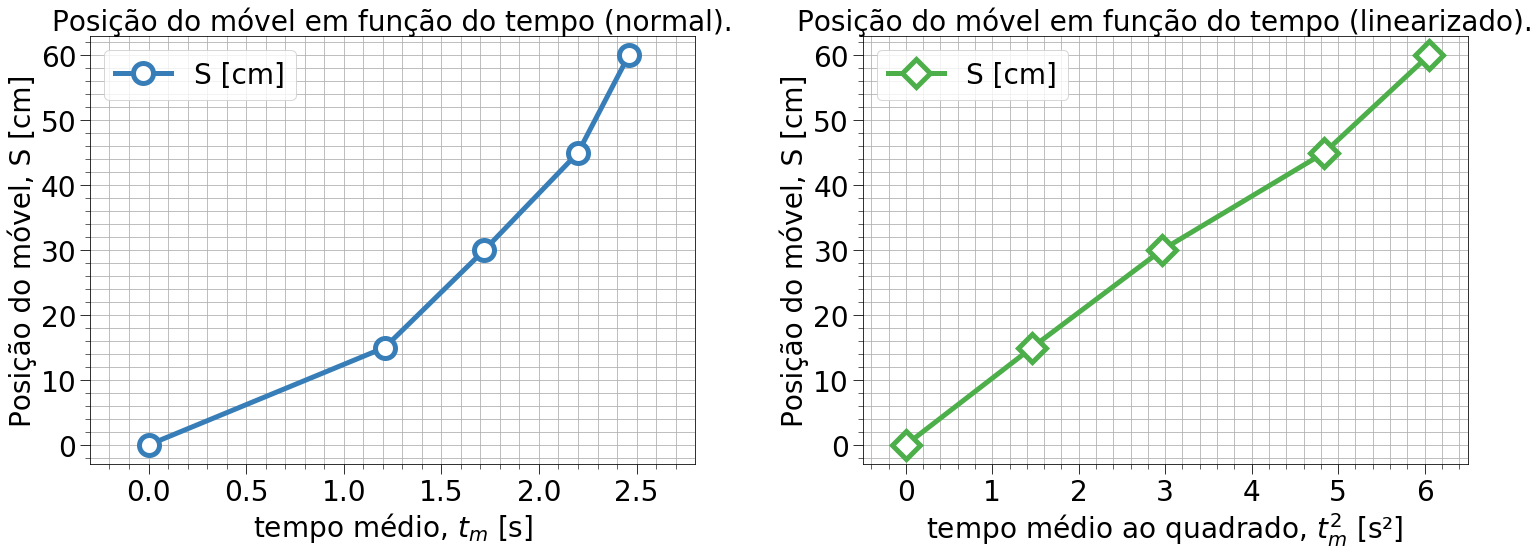

In [252]:
# criando a figura com dois gráficos: uma linha e duas colunas
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

# dicionário com opções em comum para os gráficos
kwargs = dict(markersize=20, markerfacecolor='#FFFFFF', markeredgewidth=5, lw=5, fontsize=FONT_SIZE)

# gráfico 1
df_dados.plot(
    x='tempo médio [s]', # variável independente
    y='S [cm]',          # variável dependente
    marker='o',          # tipo do marcador
    color='#377eb8',     # cor 
    ax=axarr[0],         # eixo em que o gráfico deve ser confeccionado
    xlim=(-0.3, 2.8),    # região horizontal a ser mostrada
    **kwargs             # dicionário com propriedades em comum
)

# gráfico 2
df_dados.plot(
    x='tempo médio ao quadrado [s²]', # variável independente
    y='S [cm]',                       # variável dependente
    marker='D',                       # tipo do marcador
    color='#4daf4a',                  # cor 
    ax=axarr[1],                      # eixo em que o gráfico deve ser confeccionado
    xlim=(-0.5, 6.5),                 # região horizontal a ser mostrada
    **kwargs                          # dicionário com propriedades em comum
)

# tamanho da fonte para todos os labels
FONT_SIZE=28

# loop nos gráficos
for counter, ax in enumerate(fig.get_axes()):
    # adicionando os labels no eixo x
    ax.set_xlabel(['tempo médio, $t_m$ [s]', 'tempo médio ao quadrado, $t^2_m$ [s²]'][counter], fontsize=FONT_SIZE)
    # adicionando os labels no eixo y
    ax.set_ylabel('Posição do móvel, S [cm]', fontsize=FONT_SIZE)
    # mudando o tamanho dos labels dos ticks
    ax.tick_params(labelsize=FONT_SIZE)
    # adicionando os títulos
    ax.set_title(['Posição do móvel em função do tempo (normal).',
                  'Posição do móvel em função do tempo (linearizado).'][counter], fontsize=FONT_SIZE)
    # adicionando as legendas
    ax.legend(['S [cm]'], fontsize=FONT_SIZE)
    # colocando os grids nos ticks maiores
    ax.grid(which='both')
    
# ajusta o espaçamento entre os gráficos
fig.tight_layout()

<p class='justified'>
    Vemos então que o gráfico de $S \times t^2_m$ é descrito por uma reta. Dessa forma, podemos fazer um ajuste considerando $t^2_m$ como nossa variável independente. Podemos usar o método dos mínimos quadrados e calcular todas aquelas somas (lembra daquelas "mil" somas?) separadamente. Aqui eu só vou copiar e colar (preguiça...) as funções que definimos para calcular nossos coeficientes linear e angular na aula passada:
</p>

<p class='justified'>
    O coeficiente linear
</p>

$$
  a = \frac{\sum y \sum x^2 - \sum x \sum xy}{n\sum x^2 - \left(\sum x\right)^2}
\label{eq:coef_linear}  
$$

In [40]:
def coef_linear(x, y):
    """
    Dada a equação da reta y = a + bx, fornecidos os valores correspondentes 
    das variáveis independente (x) e dependente (y), calcula-se o coeficiente 
    linear (a).
    
    Argumentos:
    -----------
    x - list: lista com os valores da variável independente
    y - list: lista com os valores da variável dependente
    
    Retorno:
    --------
    A função retorna o valor do coeficiente linear da equação da reta, isto é,
    o valor de ``a`` na equação y = a + bx.
    """
    n = len(x)          # número de dados disponíveis
    
    s_y  = y.sum()      # calcula a soma dos valores em y
    s_x2 = (x**2).sum() # calcula a soma dos valores de x²
    
    s_x  = x.sum()      # calcula a soma dos valores em x
    s_xy = (x*y).sum()  # calcula a soma dos valores xy
    
    s_2x = x.sum()**2   # calcula a soma dos valores em x e depois eleva ao quadrado
    
    numerador   = s_y*s_x2 - s_x*s_xy # calcula o numerador do coeficiente linear
    denominador = n*s_x2 - s_2x       # calcula o denominador do coeficiente linear
    
    return round(numerador/denominador, 2) # retorna o valor do coeficiente linear arredondado 
                                           # conforme o número de algarismos significativos

<p class='justified'>
    e o coeficiente angular
</p>

$$
b = \frac{n \sum xy - \sum x \sum y}{n\sum x^2 - \left(\sum x\right)^2}.
\label{eq:coef_angular}
$$

In [41]:
def coef_angular(x, y):
    """
    Dada a equação da reta y = a + bx, fornecidos os valores correspondentes 
    das variáveis independente (x) e dependente (y), calcula-se o coeficiente 
    angular (b).
    
    Argumentos:
    -----------
    x - list: lista com os valores da variável independente
    y - list: lista com os valores da variável dependente
    
    Retorno:
    --------
    A função retorna o valor do coeficiente angular da equação da reta, isto é,
    o valor de ``b`` na equação y = a + bx.
    """
    n = len(x)          # número de dados disponíveis
    
    s_xy = (x*y).sum()  # calcula a soma dos valores de xy
    
    s_x  = x.sum()      # calcula a soma dos valores em x
    s_y  = y.sum()      # calcula a soma dos valores em y
    
    s_x2 = (x**2).sum() # calcula a soma dos valores de x²
    
    s_2x = x.sum()**2   # calcula a soma dos valores em x e depois eleva ao quadrado
    
    numerador   = n*s_xy - s_x*s_y # calcula o numerador do coeficiente angular
    denominador = n*s_x2 - s_2x    # calcula o denominador do coeficiente angular
    
    return round(numerador/denominador, 2) # retorna o valor do coeficiente angular arredondado 
                                           # conforme o número de algarismos significativos

<p class='justified'>
    E agora, a única coisa que precisamos fazer é fornecer os valores das variáveis independente $x$ e dependente $y$. No nosso caso, a variável dependente é a posição do móvel, ou seja, $y\to S$. A variável independente, que nos fez observar uma reta, são os valores do tempo médio ao quadrado, portanto, $x\to t^2_m$. Dessa forma, usando o <mark class='mono_gray'>DataFrame df_dados</mark>, fornecemos as respectivas colunas:
</p>

In [42]:
coef_angular(x=df_dados['tempo médio ao quadrado [s²]'], y=df_dados['S [cm]'])

9.66

In [43]:
coef_linear(x=df_dados['tempo médio ao quadrado [s²]'], y=df_dados['S [cm]'])

0.43

<p class='justified'>
    Se fizermos uma análise dimensional, usando $[y] = [S] = cm$ e $[x] = [t^2] = s^2$, podemos mostrar que as unidades dos coeficiente linear e angular calculados são $[a] = cm$ e $[b] = cm/s^2$. Ou seja, analisando o gráfico $S \times t^2_m$, os coeficiente linear e angular representam a posição inicial do móvel e a aceleração, respectivamente. Assim, podemos escrever a equação de movimento para o móvel como:
</p>

$$
    S(t) = 0{,}43\,cm  + \left( 9{,}66\,cm/s^2 \right)t^2.
$$

<p class='justified'>
Se compararmos com a Eq. \eqref{eq:mruv_pos}, temos que $S_0 = 0{,}43\,cm$ e $\frac{1}{2}a = 9{,}66\,cm/s^2$, de maneira que a aceleração do móvel é $a = 19{,}32\,cm/s^2$.
</p>

<p class='justified'>
    Agora, em posse dessa equação, podemos calcular os valores teóricos e comparar as curvas experimental e do modelo. 
</p>

In [44]:
Y_modelo = 0.43 + 9.66*df_dados['tempo médio [s]']**2

<p class='justified'>
    Podemos definir uma função para calcular o coeficiente de determinação $R^2$ e validar a qualidade do nosso ajuste.
</p>

In [45]:
def coef_determinacao(y_dado, y_ajuste):
    """
    Função para comparar os dados com o ajuste por meio do coeficiente de determinação.
    Valores próximos de 1 indicam um ajuste bom e quanto mais próximo de 0 pior.
    
    Argumentos:
    -----------
    y_dado - array: array com os valores dos dados da variável independente.
    y_ajuste - array: array com os valores do ajuste da variável independente.
    
    Retorno:
    --------
    A função retorna um ``float`` com o valor do coeficiente de determinação R2.
    """
    
    # calcula a soma dos resíduos
    s_res = sum((y_dado - y_ajuste)**2)
    # calcula a soma total
    s_tot = sum((y_dado - y_dado.mean())**2)
    
    # retorna o coeficiente de determinação
    return round(1 - s_res/s_tot, 3)

In [46]:
coef_determinacao(df_dados['S [cm]'], Y_modelo)

0.997

<p class='justified'>
    Vemos então que $R^2 = 0{,}997$, indicando que o modelo se ajusta bem aos dados. Vamos, finalmente, comparar as curvas experimental e do modelo via gráficos:
</p>

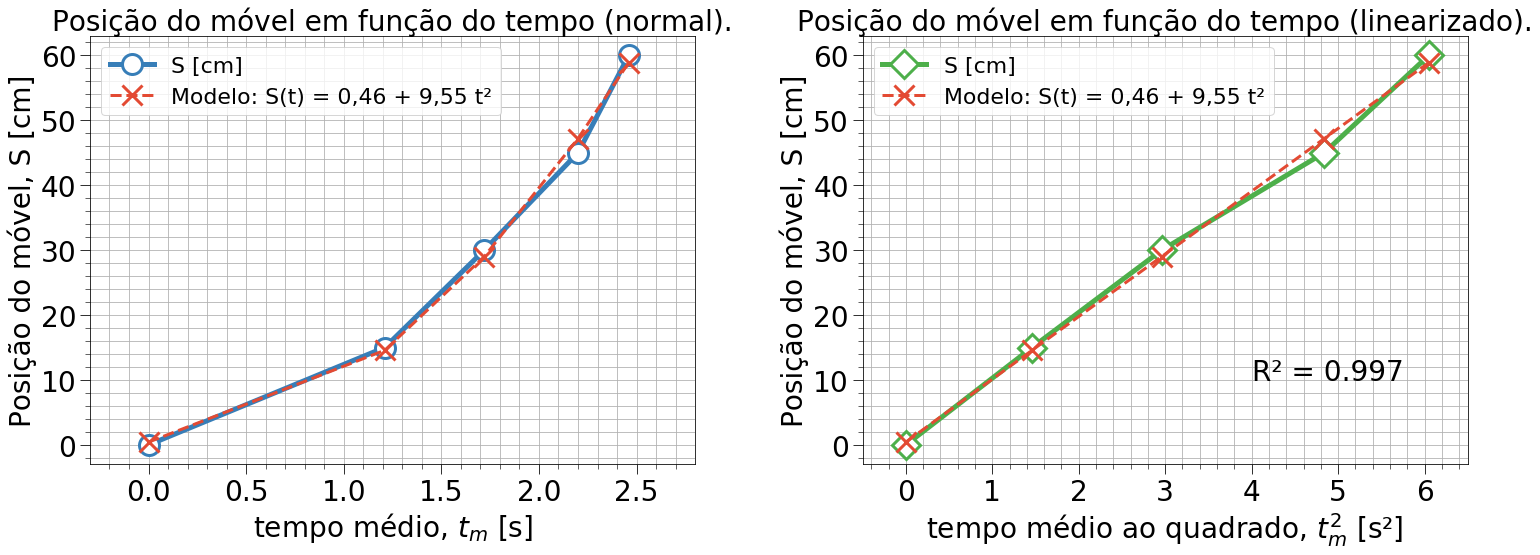

In [251]:
# criando a figura com dois gráficos: uma linha e duas colunas
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

# dicionário com opções em comum para os gráficos
kwargs = dict(markersize=20, markerfacecolor='#FFFFFF', markeredgewidth=3, lw=5, fontsize=FONT_SIZE)

kwargs_modelo = dict(marker='x', markersize=20, markeredgewidth=3, color='#E34A33', ls='--', lw=3)

# gráfico 1 - plotando os dados
df_dados.plot(
    x='tempo médio [s]', # variável independente
    y='S [cm]',          # variável dependente (dados)
    marker='o',          # tipo do marcador
    color='#377eb8',     # cor 
    ax=axarr[0],         # eixo em que o gráfico deve ser confeccionado
    xlim=(-0.3, 2.8),    # região horizontal a ser mostrada
    **kwargs             # dicionário com propriedades em comum
)

# gráfico 1 - plotando o ajuste
axarr[0].plot(
    df_dados['tempo médio [s]'], # variável independente
    Y_modelo,                    # variável dependente (modelo)
    **kwargs_modelo              # dicionário com propriedades em comum
)

# gráfico 2 - plotando os dados
df_dados.plot(
    x='tempo médio ao quadrado [s²]', # variável independente
    y='S [cm]',                       # variável dependente (dados)
    marker='D',                       # tipo do marcador
    color='#4daf4a',                  # cor 
    ax=axarr[1],                      # eixo em que o gráfico deve ser confeccionado
    xlim=(-0.5, 6.5),                 # região horizontal a ser mostrada
    **kwargs                          # dicionário com propriedades em comum
)

# gráfico 2 - plotando o ajuste
axarr[1].plot(
    df_dados['tempo médio ao quadrado [s²]'], # variável independente
    Y_modelo,                                 # variável dependente (modelo)
    **kwargs_modelo                           # dicionário com propriedades em comum
)

# tamanho da fonte para todos os labels
FONT_SIZE=28

# loop nos gráficos
for counter, ax in enumerate(fig.get_axes()):
    # adicionando os labels no eixo x
    ax.set_xlabel(['tempo médio, $t_m$ [s]', 'tempo médio ao quadrado, $t^2_m$ [s²]'][counter], fontsize=FONT_SIZE)
    # adicionando os labels no eixo y
    ax.set_ylabel('Posição do móvel, S [cm]', fontsize=FONT_SIZE)
    # mudando o tamanho dos labels dos ticks
    ax.tick_params(labelsize=FONT_SIZE)
    # adicionando os títulos
    ax.set_title(['Posição do móvel em função do tempo (normal).',
                  'Posição do móvel em função do tempo (linearizado).'][counter], fontsize=FONT_SIZE)
    # adicionando as legendas
    ax.legend(['S [cm]', 'Modelo: S(t) = 0,46 + 9,55 t²'], fontsize=22)
    # colocando os grids nos ticks maiores
    ax.grid(which='both')

# podemos inserir um texto no gráfico usando o método ``text()``
axarr[1].text(x=4, y=10, s='R² = ' + str(coef_determinacao(df_dados['S [cm]'], Y_modelo)), fontsize=FONT_SIZE)
    
# ajusta o espaçamento entre os gráficos
fig.tight_layout()

<p class='justified'>
    Vimos então que nosso ajuste usando uma parábola é muito bom. Contudo, tivemos que de certa forma chutar o comportamento da nossa função de ajuste. Podemos abordar um outro método que nos informa o tipo de potência da função que temos que considerar. Para isso, iremos fazer uma mudança de escala nos nossos dados. 
</p>

<a href="#sumario">Sumário</a>

---
<a id="mudando_a_escala_dos_dados"></a>
# Mudando a escala dos dados

<p class='justified'>
    Nessa seção teremos como objetivos encontrar o expoente da função
</p>

$$
    y = Ct^n.
    \label{eq:pot}
$$

<p class='justified'>
Na seção anterior, a partir da curva descrita pelos dados, chutamos um expoente $n=2$ e então fizemos um ajuste a partir de uma reta, considerando a variável independente $t^2$. O procedimento que iremos aplicar agora nos permitirá encontrar justamente o valor do expoente $n$, utilizando também uma regressão linear.
</p>

<p class='justified'>
    O primeiro passo é aplicar a função <mark class='mono_gray'>log</mark> em ambos os lados da equação \eqref{eq:pot}:
</p>

$$
    \log y = \log \left( C t^n \right)
    \label{eq:pot_log}
$$

<p class='justified'>
e aplicando as propriedades $\log ab = \log a + \log b$ e $\log a^b = b \log a$, escrevemos a Eq. \eqref{eq:pot_log} como
</p>

$$
    \log y = \log C + n \log t.
$$

<p class='justified'>
    Veja que essa expressão é muito parecida com a de uma reta:
</p>

$$
    y_{reta} = a + bx
$$

<p class='justified'>
em que comparando os termos, temos:
</p>

$$
\begin{split}
    \text{Potência com}\ \log &\to \text{reta} & \\
    \log y &\to y_{reta} & \text{(variável dependente)} \\
    \log x &\to x        & \text{(variável independente)} \\
    \log C &\to a        & \text{(coeficiente linear)} \\
    n      &\to b        & \text{(coeficiente angular)} 
\end{split}
$$

<p class='justified'>
Neste novo cenário, se confeccionarmos um gráfico de $\log y \times \log x$ da Eq. \eqref{eq:pot} iremos observar uma reta com coeficientes linear $\log C$ e angular $n$. Vamos explorar essa propriedade a seguir.
</p>

<p class='justified'>
    Primeiramente, iremos transformar os valores da posição $S$ e do tempo médio $t_m$ aplicando a função <mark class='mono_gray'>log</mark> do pacote <mark class='mono_gray'>numpy</mark>:
</p>

In [71]:
# criamos duas novas colunas com a função ``log`` aplicada em seus valores originais
df_dados['log S [cm]'] = np.log(df_dados['S [cm]'])
df_dados['log tempo médio [s]'] = np.log(df_dados['tempo médio [s]'])

df_dados

/home/dsvieira/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,S [cm],t1 [s],t2 [s],t3 [s],tempo médio [s],desvio padrão [s],dados reportados,tempo médio ao quadrado [s²],log S [cm],log tempo médio [s]
Sensor 1,0.0,0.000,0.000,0.000,0.00,0.00,0.0 ± 0.0,0.00,-inf,-inf
Sensor 2,15.0,1.261,1.181,1.197,1.21,0.04,1.21 ± 0.04,1.46,2.708050,0.190620
Sensor 3,30.0,1.774,1.694,1.701,1.72,0.04,1.72 ± 0.04,2.96,3.401197,0.542324
Sensor 4,45.0,2.169,2.089,2.429,2.20,0.20,2.2 ± 0.2,4.84,3.806662,0.788457
Sensor 5,60.0,2.509,2.429,2.443,2.46,0.04,2.46 ± 0.04,6.05,4.094345,0.900161


<p class='justified'>
    Observe que os valores que eram $0{,}00$ quando foram aplicados a função <mark class='mono_gray'>log</mark> agora aparecem como <mark class='mono_gray'>-inf</mark>. Isso se deve ao fato de que $\lim\limits_{x \to 0} \log x = -\infty$. Podemos continuar com esse valor em nossa tabela de dados, pois na hora de confeccionar os gráficos o programa simplesmente ignora esses valores. Ou então selecionarmos apenas as linhas que nos convém. Qualquer solução é bem vinda! Aqui iremos selecionar as colunas e as linhas de interesse:
</p>

In [72]:
# criamos uma lista com as linhas e as colunas que queremos acessar
linhas  = ['Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5']
colunas = ['log S [cm]', 'log tempo médio [s]']

# passamos essas linhas e colunas para o ``DataFrame``
# usando a propriedade ``loc``
df_dados_log = df_dados.loc[linhas, colunas]

# novo ``DataFrame`` com os valores em ``log``
df_dados_log

,log S [cm],log tempo médio [s]
Sensor 2,2.708050,0.190620
Sensor 3,3.401197,0.542324
Sensor 4,3.806662,0.788457
Sensor 5,4.094345,0.900161


<p class='justified'>
   Dessa forma, se confeccionarmos um gráfico com esses valores, teremos uma curva $\log S \times \log t_m$: 
</p>

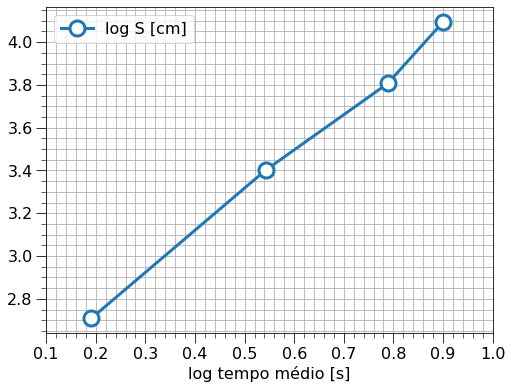

In [250]:
df_dados_log.plot(
    x='log tempo médio [s]',
    y='log S [cm]',
    marker='o',
    markersize=15,
    markerfacecolor='#FFFFFF',
    markeredgewidth=3,
    lw=3,
    xlim=(0.1, 1.0)
)

plt.grid(which='both')

<p class='justified'>
    Observe que aplicando a função <mark class='mono_gray'>log</mark> o gráfico se torna uma reta. Observe que as escalas usadas nesse gráfico são <mark class='mono_gray'>lineares</mark>, os grids em cinza deixam isso bem claro pelos seus espaçamentos idênticos. Como temos uma reta, vamos fazer uma regressão linear nesses dados. Podemos usar a função <mark class='mono_gray'>coef_angular</mark> que criamos anteriormente:
</p>

In [108]:
coef_angular(x=df_dados_log['log tempo médio [s]'], y=df_dados_log['log S [cm]'])

1.91

<p class='justified'>
    Veja que ela nos retorna um valor de $1{,}91$. Se usarmos a função <mark class='mono_gray'>np.polyfit</mark>, obteremos:
</p>

In [105]:
np.polyfit(x=df_dados_log['log tempo médio [s]'], y=df_dados_log['log S [cm]'], deg=1)

array([1.90963186, 2.34649002])

<p class='justified'>
Lembrando que os valores retornados pela função <mark class='mono_gray'>np.polyfit</mark> são referentes aos coeficientes das potências indo da maior (valor do parâmetro <mark class='mono_gray'>deg</mark>) para menor. Portanto, no nosso caso, o coeficiente angular seria o primeiro termo retornado, que arredondado, é igual a $1{,}91$.
</p>

<p class='justified'>
    Nesse nosso cenário, então, temos $n = 1{,}91 \approx 2$ de maneira que
</p>

$$
    S(t) = C t^{2}
$$

ou

$$
    \log S(t) = \log C + 2 \log t.
$$

<p class='justified'>
    Para descobrir o valor da constante $C$, podemos fazer de duas formas:
    
<ol class="sub-item">
    <li class="sub-item">Calculamos o coeficiente linear, que seria o valor de $\log C$ e aplicamos a função inversa do $\log$; ou</li>
    <li class="sub-item">Colocamos $t=1\,s$ em qualquer uma das equações anteriores de maneira que $C = S(t=1)$;</li>
</ol>
    
</p>

<p class='justified'>
        Como já temos o valor do coeficiente linear calculado pela função <mark class='mono_gray'>np.polyfit</mark>, que é o mesmo retornado pela função <mark class='mono_gray'>coef_linear</mark>,
</p>
    

In [117]:
coef_linear(x=df_dados_log['log tempo médio [s]'], y=df_dados_log['log S [cm]'])

2.35

<p class='justified'>
    podemos simplesmente aplicar a função inversa do $\log$ e obter o valor da constante $C$. A função que usamos, <mark class='mono_gray'>np.log</mark>, calcula o logaritmo de uma função considerando a base $e$:
</p>

In [118]:
np.log(np.e)

1.0

<p class='justified'>
    Portanto, devemos fazer a seguinte operação:
</p>

$$
\begin{split}
    \log C &= 2{,}35 \\
    e^{\log C} & = e^{2{,}35} \\
    C &= 10{,}49.
\end{split}
$$

<p class='justified'>
    Para obtermos o valor $S(t=1)$, teríamos que ter o valor dessa posição nesse tempo representada no gráfico. Podemos obter esse valor fazendo uma <mark class='mono_gray'>interpolação</mark> nos dados para que uma função que contenha esse pontos seja criada no intervalo em que eles existam. Quando essa função é criada, podemos obter o valor da função em qualquer ponto dentro desse intervalo. Podemos realizar isso de maneira bem simples usando a função <mark class='mono_gray'>interp1d</mark> do pacote <mark class='mono_gray'>scipy.interpolate</mark>.
</p>

<p class='justified'>
    O primeiro passo é importar a função que iremos precisar:
</p>

In [168]:
from scipy.interpolate import interp1d

<p class='justified'>
    Para essa função iremos fornecer três parâmetros: <mark class='mono_gray'>x</mark>, <mark class='mono_gray'>y</mark> e <mark class='mono_gray'>kind</mark>. O primeiro são os valores da nossa variável independente (os tempos médios), o segundo os valores da variável dependente (a posição do móvel) e o terceiro é o tipo de interpolação que deve ser feita, que no nosso caso será <mark class='mono_gray'>'quadratic'</mark>:
</p>

In [170]:
funcao_interpolada = interp1d(x=df_dados['tempo médio [s]'], y=df_dados['S [cm]'], kind='quadratic')
funcao_interpolada

<p class='justified'>
    Ela retorna um objeto que na verdade é uma função. Essa pode receber os valores da variável independente, retornando os valores da variável dependente, baseado nos dados inseridos na função <mark class='mono_gray'>interp1d</mark>:
</p>

In [171]:
funcao_interpolada(df_dados['tempo médio [s]'])

array([ 0., 15., 30., 45., 60.])

<p class='justified'>
    Como mencionado anteriormente, o intervalo em que a função vale é o intervalo que foi fornecido para criar a interpolação. Dessa forma, podemos colocar qualquer valor entre $[0{,}00, 2{,}46]$:
</p>

In [175]:
print("tempo médio mínimo: " + str(df_dados['tempo médio [s]'].min()))
print("tempo médio máximo: " + str(df_dados['tempo médio [s]'].max()))

tempo médio mínimo: 0.0
tempo médio máximo: 2.46


<p class='justified'>
    Se tentarmos obter o valor da <mark class='mono_gray'>funcao_interpolada</mark> em $t=3{,}00\,s$, por exemplo, obtemos um erro:  
</p>

In [176]:
funcao_interpolada(3)

ValueError: A value in x_new is above the interpolation range.

<p class='justified'>
    Porém, qualquer outro valor nesse intervalo nos gera valores da função:
</p>

In [177]:
funcao_interpolada(np.arange(0, 2.5, 0.1))

array([ 0.00000000e+00, -4.48896202e-03,  2.15194758e-01,  6.59051159e-01,
        1.32708024e+00,  2.21928201e+00,  3.33565645e+00,  4.67620358e+00,
        6.24092339e+00,  8.02981588e+00,  1.00428811e+01,  1.22801189e+01,
        1.47415294e+01,  1.74271127e+01,  2.03368686e+01,  2.34490471e+01,
        2.65053110e+01,  2.94306448e+01,  3.22250486e+01,  3.48885222e+01,
        3.75018057e+01,  4.08117434e+01,  4.50000000e+01,  5.00665756e+01,
        5.60114702e+01])

<p class='justified'>
    Assim, podemos ver qual o valor da constante $C$ fazendo $t=1{,}00$ na nossa função interpolada:
</p>

In [178]:
funcao_interpolada(1)

array(10.04288106)

<p class='justified'>
    Obtemos o valor aproximado de $10{,}04$, algo bem próximo de $10{,}49$. Vamos considerar o valor obtido por meio da interpolação.
</p>

<p class='justified'>
    Fazendo uma análise dimensional, podemos constatar que
</p>

$$
\begin{split}
    [S] &= [C][t^{2}] \\
    L   &= [C]T^{2} \\
    [C] &= L T^{-2},
\end{split}
$$

<p class='justified'>
    ou seja, a constante $C$ possui dimensão de comprimento dividido por tempo ao quadrado. Em nossas medidas, as unidades de comprimento e tempo são $cm$ e $s$, respectivamente, de maneira que a unidade da constante $C$ é
</p>

$$
    [C] = cm/s^{2},
$$

<p class='justified'>
    que é a unidade de aceleração. Portanto, a equação a partir desse método é escrita como
</p>

$$
    S(t) = \left( 10{,}04\,cm/s^2 \right) t^{2}.
$$

Vamos comparar essa equação com os dados experimentais:

In [226]:
# posições segundo o modelo obtido via mudança de escala
Y_escala = 10.04*df_dados['tempo médio [s]']**2

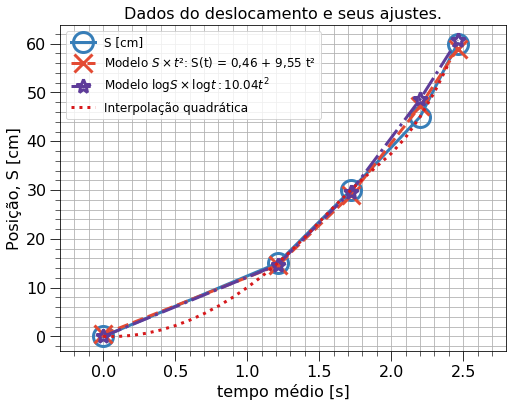

In [248]:
# dicionário com opções em comum para os gráficos
kwargs = dict(markerfacecolor='none', markeredgewidth=3, lw=3)

# gráfico 1 - plotando os dados
df_dados.plot(
    x='tempo médio [s]', # variável independente
    y='S [cm]',          # variável dependente (dados)
    marker='o',          # tipo do marcador
    markersize=20,       # tamanho do marcador
    color='#377eb8',     # cor 
    xlim=(-0.3, 2.8),    # região horizontal a ser mostrada
    **kwargs             # dicionário com propriedades em comum
)

plt.plot(
    df_dados['tempo médio [s]'], # variável independente
    Y_modelo,                    # variável dependente (dados)
    marker='x',                  # tipo do marcador
    markersize=18,               # tamanho do marcador
    color='#E34A33',             # cor 
    ls='--',                     # estilo da linha
    **kwargs                     # dicionário com propriedades em comum
)

plt.plot(
    df_dados['tempo médio [s]'], # variável independente
    Y_escala,                    # variável dependente (dados)
    marker='*',                  # tipo do marcador
    markersize=14,               # tamanho do marcador
    color='#5e3c99',             # cor 
    ls='-.',                     # estilo da linha
    **kwargs                     # dicionário com propriedades em comum
)

plt.plot(
    np.arange(0, 2.5, 0.1),    # variável independente
    f(np.arange(0, 2.5, 0.1)), # variável dependente (dados)
    color='#d7191c',           # cor 
    ls=':',                    # estilo da linha
    **kwargs                   # dicionário com propriedades em comum
)

# tamanho da fonte para os labels
FONT_SIZE=16

# definindo os labels, título e legendas
plt.ylabel('Posição, S [cm]', fontsize=FONT_SIZE) # label no eixo y
plt.title('Dados do deslocamento e seus ajustes.', fontsize=FONT_SIZE) # título
plt.legend(['S [cm]', 'Modelo $S \\times t²$: S(t) = 0,46 + 9,55 t²',
            'Modelo $\log S\\times \log t: 10.04t^{2}$',
            'Interpolação quadrática'], fontsize=12) # legendas

plt.grid(which='both')

<p class='justified'>
    Vemos então que ambos os ajustes são bons para os dados. Por meio do <mark class='mono_gray'>coeficiente de determinação</mark>, podemos quantificar qual modelo é melhor. Como a regressão linear foi feita em escala <mark class='mono_gray'>log-log</mark> a comparação entre os dados e o valor do modelo deve ser feita nessa escala. Dessa forma:
</p>

In [229]:
coef_determinacao(np.log(df_dados['S [cm]'].iloc[1:]), np.log(Y_escala[1:]))

0.994

<p class='justified'>
    Observe que retiramos o valor $0{,}00$ dos dados para o cálculo do logaritmo e posteriormente de $R^2$. Mais uma vez, isso se deve ao fato de que $\lim\limits_{x\to 0} \log x = -\infty$ e teríamos uma divergência no valor calculado. Vemos também que o valor de $R^2$ do modelo obtido por meio da transformação <mark class='mono_gray'>log-log</mark> é muito próximo ao do obtido quando ajustamos os dados via uma reta $S \times t^2$. 
</p>

<p class='justified'>
    Podemos ainda comparar os modelos em um gráfico <mark class='mono_gray'>log-log</mark>:
</p>

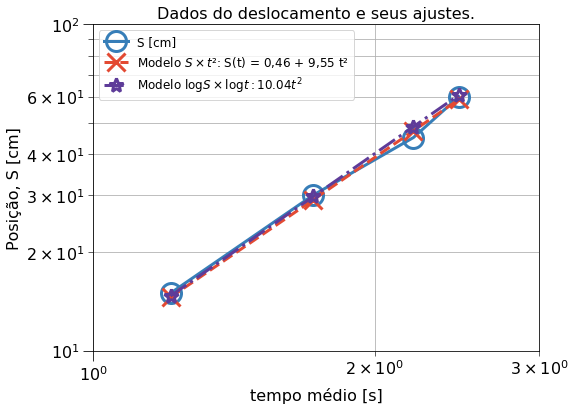

In [255]:
# dicionário com opções em comum para os gráficos
kwargs = dict(markerfacecolor='none', markeredgewidth=3, lw=3)

# gráfico 1 - plotando os dados
df_dados.iloc[1:].plot(
    x='tempo médio [s]', # variável independente
    y='S [cm]',          # variável dependente (dados)
    marker='o',          # tipo do marcador
    markersize=20,       # tamanho do marcador
    color='#377eb8',     # cor 
    **kwargs             # dicionário com propriedades em comum
)

plt.plot(
    df_dados.iloc[1:]['tempo médio [s]'], # variável independente
    Y_modelo[1:],                    # variável dependente (dados)
    marker='x',                  # tipo do marcador
    markersize=18,               # tamanho do marcador
    color='#E34A33',             # cor 
    ls='--',                     # estilo da linha
    **kwargs                     # dicionário com propriedades em comum
)

plt.plot(
    df_dados.iloc[1:]['tempo médio [s]'], # variável independente
    Y_escala[1:],                    # variável dependente (dados)
    marker='*',                  # tipo do marcador
    markersize=14,               # tamanho do marcador
    color='#5e3c99',             # cor 
    ls='-.',                     # estilo da linha
    **kwargs                     # dicionário com propriedades em comum
)

# tamanho da fonte para os labels
FONT_SIZE=16

# definindo os labels, título e legendas
plt.ylabel('Posição, S [cm]', fontsize=FONT_SIZE) # label no eixo y
plt.title('Dados do deslocamento e seus ajustes.', fontsize=FONT_SIZE) # título
plt.legend(['S [cm]', 'Modelo $S \\times t²$: S(t) = 0,46 + 9,55 t²',
            'Modelo $\log S\\times \log t: 10.04t^{2}$',
            'Interpolação quadrática'], fontsize=12) # legendas

plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 3)
plt.ylim(10, 100)
plt.grid(which='both')

<p class='justified'>
    Podemos então observar os dados de três formas    
</p>

<b>1.</b> $S \times t$, observamos uma parábola;<br>
<b>2.</b> $S \times t^2$, observamos uma reta, cujo coeficiente angular é $\frac{1}{2}a$;<br>
<b>3.</b> $\log S \times \log t$, observamos uma reta, cujo coeficiente angular é o expoente $n$.

<p class='justified'>
Na figura a seguir iremos colocar esses quatro gráficos.
</p>

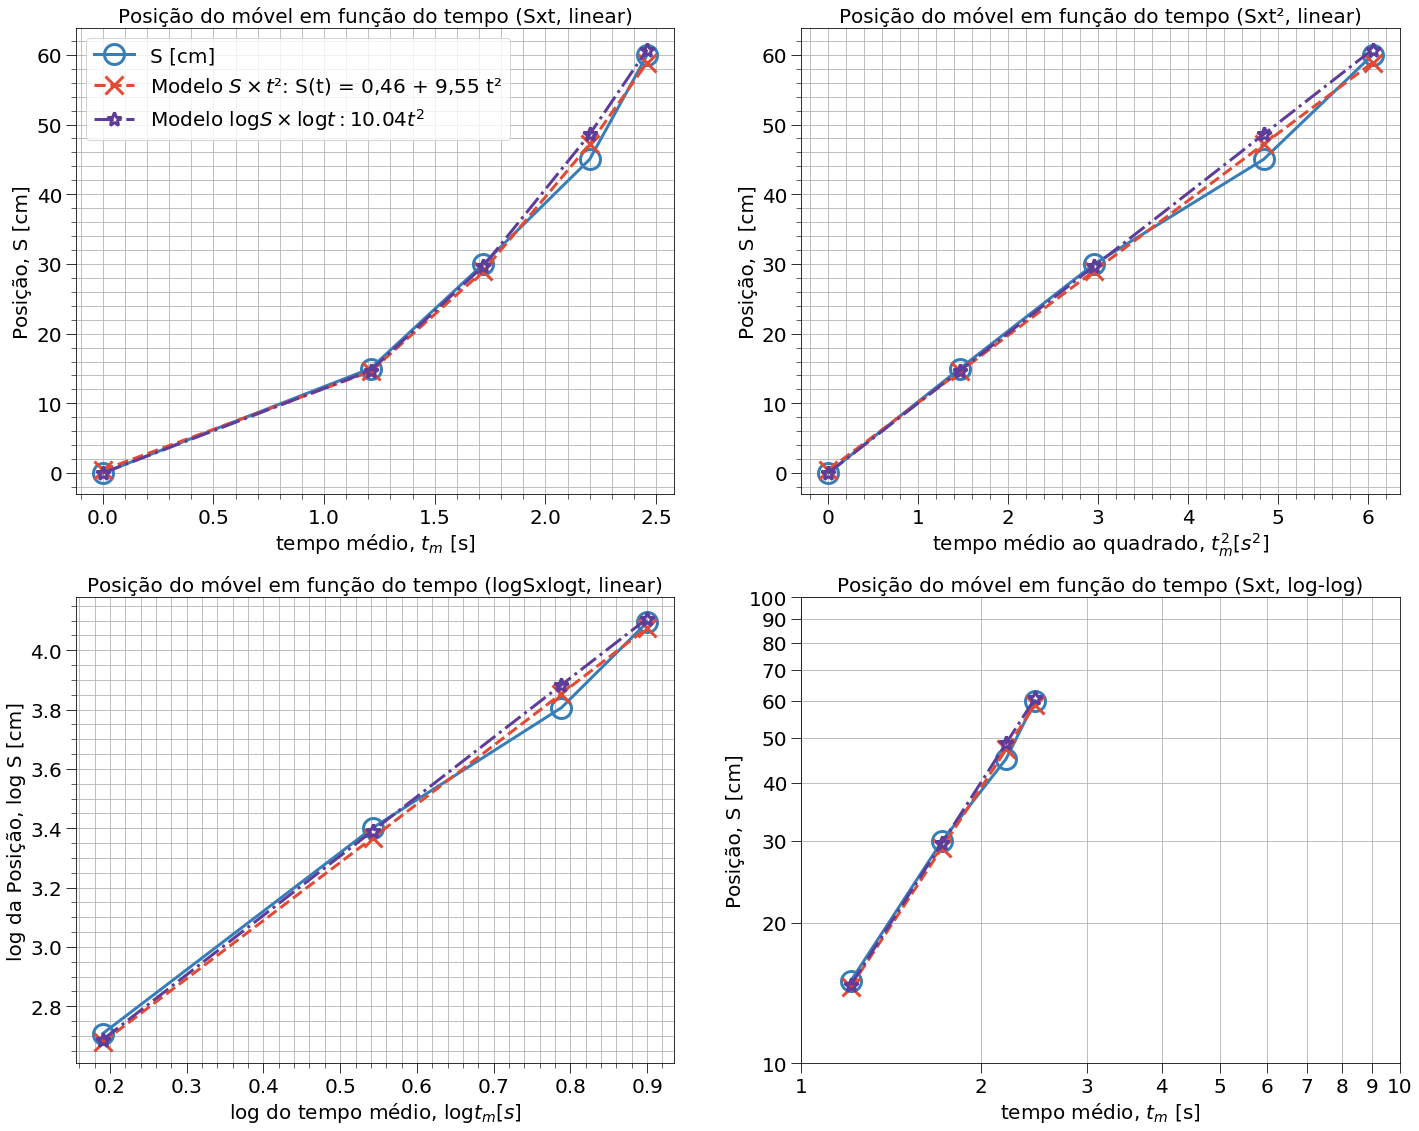

In [329]:
# dicionário com opções em comum para os gráficos
kwargs = dict(markerfacecolor='none', markeredgewidth=3, lw=3)

# função para plotar os dados
def plot_dados(x, y, escala, ax):
    
    if escala == 'Sxt-lin':
        x = x
        y = y
    elif escala == 'Sxt2':
        x = x**2
        y = y
    elif escala == 'Sxt-log':
        x = x[1:]
        y = y[1:]
    elif escala == 'logSxlogt':
        x = np.log(x[1:])
        y = np.log(y[1:])
        
    ax.plot(
    x, # variável independente
    y,          # variável dependente (dados)
    marker='o',          # tipo do marcador
    markersize=20,       # tamanho do marcador
    color='#377eb8',     # cor 
    **kwargs,             # dicionário com propriedades em comum
    )

# função para plotar o modelo obtido de Sxt²
def plot_modelo(x, y, escala, ax):
    if escala == 'Sxt-lin':
        x = x
        y = y
    elif escala == 'Sxt2':
        x = x**2
        y = y
    elif escala == 'Sxt-log':
        x = x[1:]
        y = y[1:]
    elif escala == 'logSxlogt':
        x = np.log(x[1:])
        y = np.log(y[1:])
        
    ax.plot(
    x, 
    y,
    marker='x',                      # tipo do marcador
    markersize=18,                   # tamanho do marcador
    color='#E34A33',                 # cor 
    ls='--',                         # estilo da linha
    **kwargs                        # dicionário com propriedades em comum
    )

# função para plotar o modelo obtido de logSxlogt
def plot_escala(x, y, escala, ax):
    if escala == 'Sxt-lin':
        x = x
        y = y
    elif escala == 'Sxt2':
        x = x**2
        y = y
    elif escala == 'Sxt-log':
        x = x[1:]
        y = y[1:]
    elif escala == 'logSxlogt':
        x = np.log(x[1:])
        y = np.log(y[1:])
        
    ax.plot(
    x, 
    y,
    marker='*',                  # tipo do marcador
    markersize=14,               # tamanho do marcador
    color='#5e3c99',             # cor 
    ls='-.',                     # estilo da linha
    **kwargs                     # dicionário com propriedades em comum
    )

# cria o objeto ``Figure`` e o array de gráficos
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))

lista_escalas = ['Sxt-lin', 'Sxt2', 'logSxlogt', 'Sxt-log']
titulos = ['Posição do móvel em função do tempo (Sxt, linear)',
           'Posição do móvel em função do tempo (Sxt², linear)',
           'Posição do móvel em função do tempo (logSxlogt, linear)',
           'Posição do móvel em função do tempo (Sxt, log-log)'
          ]
ylabels = ['Posição, S [cm]', 'Posição, S [cm]', 'log da Posição, log S [cm]', 'Posição, S [cm]']
xlabels = ['tempo médio, $t_m$ [s]', 'tempo médio ao quadrado, $t^2_m [s^2]$', 
           'log do tempo médio, $\log t_m [s]$', 'tempo médio, $t_m$ [s]']

legendas = ['S [cm]', 
            'Modelo $S \\times t²$: S(t) = 0,46 + 9,55 t²',
            'Modelo $\log S\\times \log t: 10.04t^{2}$']

FONT_SIZE = 20

for counter, ax in enumerate(fig.get_axes()):
    plot_dados( x=df_dados['tempo médio [s]'], y=df_dados['S [cm]'], escala=lista_escalas[counter], ax=ax)
    plot_modelo(x=df_dados['tempo médio [s]'], y=Y_modelo, escala=lista_escalas[counter], ax=ax)
    plot_escala(x=df_dados['tempo médio [s]'], y=Y_escala, escala=lista_escalas[counter], ax=ax)
    
    ax.grid(which='both')
    
    
    ax.set_title(titulos[counter], fontsize=FONT_SIZE)
    ax.set_ylabel(ylabels[counter], fontsize=FONT_SIZE)
    ax.set_xlabel(xlabels[counter], fontsize=FONT_SIZE)
    ax.tick_params(labelsize=FONT_SIZE)
    
    if counter == 0:
        ax.legend(legendas, fontsize=FONT_SIZE) # legendas
    
    if counter == 3:
        ax.set_yscale('log')
        ax.set_xscale('log')
        
        ax.set_ylim(10, 100)
        ax.set_xlim(1, 10)
        
        ax.set_yticks(np.arange(10,110,10))
        ax.set_yticklabels(np.arange(10,110,10), fontsize=FONT_SIZE)
        
        ax.set_xticks(np.arange(1, 11).round(1))
        ax.set_xticklabels(np.arange(1, 11).round(1), fontsize=FONT_SIZE)
        
        
fig.tight_layout()

<p class='justified'>
    Todos os gráficos possuem três curvas: os dados obtidos do experimento (linha azul com círculos), modelo obtido por meio de uma linearização $S \times t^2$ (linha tracejada vermelha com X) e o modelo obtido aplicando a escala log (linha pontilhada-tracejada roxa com estrelas). O primeiro gráfico (primeiras linha e coluna) confecciona as três curvas nas escalas originais considerando as variáveis $S \times t$. O segundo gráfico (primeira linha e segunda coluna) possui a posição original, mas o eixo horizontal é representado pela variável $t^2$, de modo que o gráfico $S \times t^2$, é linear nas duas escalas. No terceiro (segunda linha e primeira coluna) a função log é aplicada às variáveis dependente e independente, de modo que as curvas são confeccionadas em uma escala linear. O último gráfico (segundas linha e coluna) representam um gráfico com as variáveis dependente e independente com seus valores originais, contudo, as escalas de ambos os eixos foram alteradas para logarítmica (observe o espaçamento não linear entre as linhas).
</p>

<a href="#sumario">Sumário</a>

---
<a id="desvio_percentual"></a>
# Desvio percentual

<p class='justified'>
    Durante nossas análises obtemos dois ajustes para nossos dados: 
</p>

<b>1.</b> considerando a linearização $S \times t^2$: $S(t) = 0{,}49 + 9{,}66 t^2$, implicando em $a_{t^2} = 19{,}32\,cm/s^2$, e<br>
<b>2.</b> considerando a linearização $\log S \times \log t$: $S(t) = 10{,}04t^2$, implicando em $a_{\log t} = 20{,}08\,cm/s^2$.<br>

<p class='justified'>
    
</p>

<p class='justified'>
    Podemos fazer a comparação desses valores usando o desvio percentual:
</p>

$$
    D_a = \left| \frac{a_{\log t} - a_{t^2}}{a_{t^2}} \right|\cdot 100\% = \left| \frac{20{,}08\,cm/s^2 - 19{,}32\,cm/s^2}{19{,}32\,cm/s^2} \right|\cdot 100\% = 3{,}93\%
$$

<p class='justified'>
    Vemos então que a diferença entre os dois valores é de aproximadamente $4{,}00\%$. Podemos concluir que a abordagem por meio dos dois métodos fornecem resultados similares e de fato representam bem os dados obtidos experimentalmente. 
</p>

<a href="#sumario">Sumário</a>

---
<a id="ajustando_os_dados_usando_a_funcao_quadratica"></a>
# Ajustando os dados usando a função quadrática

<p class='justified'>
    Anteriormente ajustamos os dados considerando curvas descritas por uma reta. Usamos então as equações adquiridas pelo método dos mínimos quadrados para encontrar os coeficiente linear e angular. Também fizemos esse procedimento utilizando a função <mark class='mono_gray'>np.polyfit()</mark> fornecendo um grau do polinômio como 1. Podemos ajustar nossos dados usando uma função polinomial de grau 2, simplesmente com o código:
</p>

In [45]:
params_polyfit = np.polyfit(df_dados['tempo médio [s]'], df_dados['S [cm]'], deg=2)
params_polyfit

array([9.30415721, 0.93191159, 0.08839941])

<p class='justified'>
    Esses parâmetros, segundo a equação
</p>

$$
    S(t) = S_0 + v_0 t + \frac{1}{2}a t^2,
$$

<p class='justified'>
    representam $\frac{1}{2}a = 9{,}40\,cm/s^2$, $v_0 = 0{,}93\,cm/s$ e $S_0 = 0{,}09\,cm$, de maneira que
</p>

$$
    S(t) = 0{,}09\,cm + \left( 0{,}93\,cm/s \right) t + \left( 18{,}40\,cm/s^2 \right) t^2.
$$

<p class='justified'>
    Observe que o valor da aceleração obtido por esse método é muito próximo ao do obtido pelo método obtido por linearização $S \times t^2$: $a = 19{,}10\,cm/s^2$. É possível também criarmos uma função para que essa possa ser ajustada aos dados. Para isso, usaremos a função <mark class='mono_gray'>curve_fit()</mark> que se encontra no módulo <mark class='mono_gray'>optmize</mark> do <mark class='mono_gray'>scipy</mark>:
</p>

In [38]:
from scipy.optimize import curve_fit

<p class='justified'>
    Para usar essa função, primeiramente definimos a função matemática que queremos usar para ajustar os dados. Vamos considerar um polinômio de grau 2:
</p>

In [3]:
def func_quad(x, a, b, c):
    return a*x**2 + b*x + c

<p class='justified'>
    É importante que a variável independente <mark class='mono_gray'>x</mark> seja o primeiro parâmetro da função definida. Uma vez que temos a função de interesse, podemos então ajustar os dados fornecendo à função <mark class='mono_gray'>curve_fit</mark> três parâmetros: a função matemática que queremos obter os coeficientes, a variável independente dos dados e a variável dependente dos dados. A função retorna então dois arrays, no qual o primeiro deles são os parâmetros da função, na ordem em que eles foram definidos:
</p>

In [47]:
params_curve_fit, _ = optimize.curve_fit(func_quad, df_dados['tempo médio [s]'], df_dados['S [cm]'])
params_curve_fit

array([9.30415816, 0.93190907, 0.08839991])

<p class='justified'>
    Observe que os valores são idênticos aos obtidos por meio da função <mark class='mono_gray'>np.polyfit</mark>, pois ambas funções usam o método dos mínimos quadrados para encontrar os valores dos parâmetros. Agora que sabemos como usar uma função que ajusta qualquer função matemática, vamos ajustar a função potência:
</p>

$$
    S(t) = Ct^n
$$

<p class='justified'>
    para obter os valores dos parâmetros $C$ e $n$ sem métodos de linearização. Primeiramente temos que definir tal função:
</p>

In [57]:
def func_pot(t, c, n):
    return c*t**n

In [58]:
params_curve_fit_pot, _ = curve_fit(func_pot, df_dados['tempo médio [s]'], df_dados['S [cm]'])
params_curve_fit_pot

array([10.12738317,  1.9521999 ])

<p class='justified'>
    Com esses valores, a equação é reescrita como
</p>

$$
    S(t) = \left( 10{,}13\,cm/s^2 \right)t^{2}
$$

<p class='justified'>
    em que arredondamos o valor do expoente $n = 1{,}95 \approx 2$. Esse valor da constante $C$, implica em uma aceleração $a = 20{,}26\,cm/s^2$, já que $C = \frac{1}{2}a$. Observe que esse valor é muito próximo do obtido via método de linearização $\log S \times \log t$: $a = 20{,}08\,cm/s^2$.
</p>

<p class='justified'>
    Podemos então comparar nossos resultados por meio da confecção das curvas com os dados experimentais:
</p>

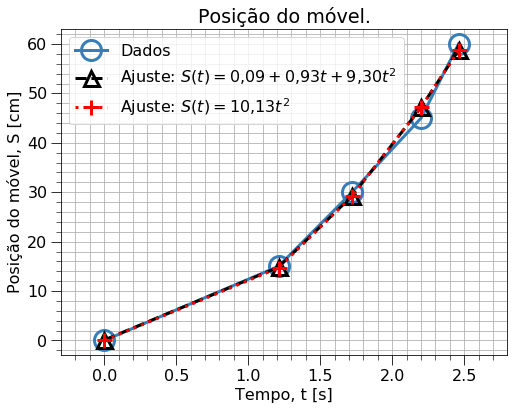

In [69]:
# dicionário com opções em comum para os gráficos
kwargs = dict(markerfacecolor='none', markeredgewidth=3, lw=3)

# plotando os dados
df_dados.plot(
    x='tempo médio [s]', # variável independente
    y='S [cm]',          # variável dependente (dados)
    marker='o',          # tipo do marcador
    markersize=20,       # tamanho do marcador
    color='#377eb8',     # cor 
    xlim=(-0.3, 2.8),    # região horizontal a ser mostrada
    **kwargs             # dicionário com propriedades em comum
)

# plotando a função quadrada completa
plt.plot(
    df_dados['tempo médio [s]'],
    func_quad(df_dados['tempo médio [s]'], *params_polyfit),
    color="#000000",
    marker='^',
    markersize=15,
    markerfacecolor='none',
    markeredgewidth=3,
    lw=3,
    ls='--'
)

# plotando a função quadrada incompleta
plt.plot(
    df_dados['tempo médio [s]'],
    func_pot(df_dados['tempo médio [s]'], *params_curve_fit_pot),
    color="#FF0000",
    marker='+',
    markersize=15,
    markerfacecolor='none',
    markeredgewidth=3,
    lw=3,
    ls=':'
)

plt.title('Posição do móvel.')
plt.xlabel('Tempo, t [s]')
plt.ylabel('Posição do móvel, S [cm]')
plt.legend(['Dados', 
            'Ajuste: $S(t) = 0{,}09 + 0{,}93 t + 9{,}30t^2$',
            'Ajuste: $S(t) = 10{,}13t^2$'])

plt.grid(which='both')

<p class='justified'>
    Vemos então que ambos os ajustes fornecem uma boa descrição dos dados. Como, experimentalmente, as condições foram preparadas de maneira que $S_0 \approx 0{,}00\,cm$ e $v_0 \approx 0{,}00\,cm/s$, usamos o modelo que nos fornece a função apenas com o termo de aceleração.
</p>